# <center>Proyecto final Introducción a los sistemas Inteligentes</center>
<h2 align = center>Jhon Sebastián Moreno Triana</h2>

En el siguiente Notebook se realiza un modelo de inteligencia artificial de clasificación que predice el rendimiento de los estudiantes en las pruebas Saber Pro en colombia a partir de un conjunto de variables. Las secciones de este Notebook son las siguientes:

    A. Importación de los datos:
  Aquí se importan los datos para trabajar, los datos se cargan desde Kaggle.
    
    B. Limpieza de datos:
  Aqui empezamos a hacer la limpieza de los DataFrames cargados.

    C. Exploración de los datos:
  Aqui se realizan diferentes gráficas para ver la influencia de los datos sobre el rendimiento de los estudiantes, además se seleccionan los datos que ingresarán al modelo.

    D. Modelos:
  El modelo seleccionado es un modelo de redes neuronales, en esta sección se explora una red neuronal básica, explorar hiperparámetros en la sección siguiente.

    E. Exploración de Hiperparámetros:
  En esta sección se exploran los siguientes hiperparámetros:

  - Número de capas de la red.
  - Número de neuronas por capas.
  - La función de activación.
  - Learning rate.

  Obteniendo los valores más óptimos dado unos datos de entrenamiento arbitrarios para el modelo.
  
    
    F. Evaluación del desempeño del modelo:
  Dados los datos obtenidos anteriormente se entrena el modelo y se prepara para su implementación. Se mide el desempeño de la red neuronal con los datos de test que corresponde a un 30% de los datos de entrenamiento.

    G. Conclusiones y resultados:
  Se implementa el modelo a los datos de test.csv y se concluye con los datos obtenidos.

    H. Generación de archivo de envío
  Se genera el archivo final y se envía al kaggle.

# A. Importación de los datos

Primero importamos las librerías que serán usadas

In [1]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import sklearn as sk
import tensorflow as tf

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
print("Por favor sube el kaggle.json que descargaste:")
uploaded = files.upload()
print(f"{list(uploaded.keys())[0]} uploaded")

Por favor sube el kaggle.json que descargaste:


Saving kaggle.json to kaggle.json
kaggle.json uploaded


In [4]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

Luego, descargamos los datos desde Kaggle y los ordenamos en la carpeta Data.

In [5]:
! kaggle competitions download -c pruebas-saber-pro-colombia-isi2023 && mkdir -p Data && unzip pruebas-saber-pro-colombia-isi2023.zip -d Data && rm pruebas-saber-pro-colombia-isi2023.zip
! rm Data/submission.csv

 80% 17.0M/21.2M [00:00<00:00, 37.1MB/s]
100% 21.2M/21.2M [00:00<00:00, 43.8MB/s]
Archive:  pruebas-saber-pro-colombia-isi2023.zip
  inflating: Data/submission.csv     
  inflating: Data/test.csv           
  inflating: Data/train.csv          


Creamos los dataframes usando la librería pandas de python

In [107]:
train_path = "Data/train.csv"
test_path = "Data/test.csv"

test = pd.read_csv(test_path, header = 0, index_col = False)
train = pd.read_csv(train_path, index_col = False, header = 0)

# B. Limpieza de datos

## B.1. Datos test.csv

### B.1.1. Exploración del dataFrame
Inicialmente, se revisará la estructura del dataFrame de los datos de Test, como primer elemento a explorar se revisarán las columnas en el dataFrame:

In [108]:
print("Data Frame columns names: \n")
for col in test.columns.values.tolist():
    print("\t", col)

Data Frame columns names: 

	 ID
	 PERIODO
	 ESTU_PRGM_ACADEMICO
	 ESTU_PRGM_DEPARTAMENTO
	 ESTU_VALORMATRICULAUNIVERSIDAD
	 ESTU_HORASSEMANATRABAJA
	 FAMI_ESTRATOVIVIENDA
	 FAMI_TIENEINTERNET
	 FAMI_EDUCACIONPADRE
	 FAMI_TIENELAVADORA
	 FAMI_TIENEAUTOMOVIL
	 ESTU_PRIVADO_LIBERTAD
	 ESTU_PAGOMATRICULAPROPIO
	 FAMI_TIENECOMPUTADOR
	 FAMI_TIENEINTERNET.1
	 FAMI_EDUCACIONMADRE


Luego, contaremos la cantidad de filas en el dataFrame, para conocer el número de elementos a estudiar:

In [109]:
print("Data Frame rows count: \n \n \t", test.shape[0])

Data Frame rows count: 
 
 	 296786


Conociendo las columnas en el dataset, podemos conocer cuales de ellas tienen nan values y cuantos son

In [110]:
test_nan_cols = test.columns[test.isna().any()].tolist()
print("NaN values count: \n")
for col in test_nan_cols:
    print("\t",col,":",test[col].isna().sum())

NaN values count: 

	 ESTU_VALORMATRICULAUNIVERSIDAD : 2723
	 ESTU_HORASSEMANATRABAJA : 13379
	 FAMI_ESTRATOVIVIENDA : 13795
	 FAMI_TIENEINTERNET : 11539
	 FAMI_EDUCACIONPADRE : 9993
	 FAMI_TIENELAVADORA : 17259
	 FAMI_TIENEAUTOMOVIL : 18918
	 ESTU_PAGOMATRICULAPROPIO : 2807
	 FAMI_TIENECOMPUTADOR : 16439
	 FAMI_TIENEINTERNET.1 : 11539
	 FAMI_EDUCACIONMADRE : 10223


Finalmente, conviene ver los valores posibles para cada una de las columnas.

In [111]:
cols = ["PERIODO", 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA','FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'ESTU_PRIVADO_LIBERTAD', 'FAMI_EDUCACIONMADRE']
print("Posibles valores en cada columna: \n")
for col in cols:
    print("\t", col, ":\n \t \t", test[col].unique().tolist())
    print()

Posibles valores en cada columna: 

	 PERIODO :
 	 	 [20183, 20203, 20212, 20195, 20196, 20194, 20213, 20202, 20184]

	 ESTU_PRGM_DEPARTAMENTO :
 	 	 ['BOLIVAR', 'ANTIOQUIA', 'BOGOTÁ', 'SUCRE', 'ATLANTICO', 'VALLE', 'SANTANDER', 'RISARALDA', 'QUINDIO', 'CASANARE', 'NORTE SANTANDER', 'CAUCA', 'HUILA', 'CALDAS', 'CHOCO', 'CORDOBA', 'LA GUAJIRA', 'META', 'NARIÑO', 'BOYACA', 'TOLIMA', 'CUNDINAMARCA', 'MAGDALENA', 'CESAR', 'PUTUMAYO', 'CAQUETA', 'ARAUCA', 'AMAZONAS', 'VAUPES', 'SAN ANDRES', 'GUAVIARE']

	 ESTU_VALORMATRICULAUNIVERSIDAD :
 	 	 ['Menos de 500 mil', 'Entre 2.5 millones y menos de 4 millones', 'Entre 1 millón y menos de 2.5 millones', 'Entre 500 mil y menos de 1 millón', 'Más de 7 millones', 'Entre 4 millones y menos de 5.5 millones', 'Entre 5.5 millones y menos de 7 millones', 'No pagó matrícula', nan]

	 ESTU_HORASSEMANATRABAJA :
 	 	 ['Menos de 10 horas', 'Entre 21 y 30 horas', '0', 'Entre 11 y 20 horas', 'Más de 30 horas', nan]

	 FAMI_ESTRATOVIVIENDA :
 	 	 ['Estrato 3', '

Las demás colúmnas tienen las clases "sí", "no" o "nan", o tienen demasiadas categorías como es el caso de la columna "ESTU_PRGM_ACADEMICO"

### B.1.2. Limpieza de los datos

Eliminación de los valores NaN.

In [112]:
test_modes = []
for nan_col in test_nan_cols:
    test_modes.append(test[nan_col].mode(dropna = True).tolist()[0])
test_modes

['Entre 1 millón y menos de 2.5 millones',
 'Más de 30 horas',
 'Estrato 2',
 'Si',
 'Secundaria (Bachillerato) completa',
 'Si',
 'No',
 'No',
 'Si',
 'Si',
 'Secundaria (Bachillerato) completa']

In [113]:
for i in range(len(test_nan_cols)):
    test[test_nan_cols[i]] = test[test_nan_cols[i]].fillna(test_modes[i])

final_test_nan_cols = test.columns[test.isna().any()].tolist()
print("NaN values count: \n")
for col in final_test_nan_cols:
    print("\t",col,":",test[col].isna().sum())

NaN values count: 



### B.1.3. Eliminar redundancias

En el Data Frame existen dos columnas que son aparentemente iguales, es el caso de "FAM_TIENEINTERNET" y "FAM_TIENEINTERNET.1", por tanto,

In [114]:
test[test['FAMI_TIENEINTERNET'] != test['FAMI_TIENEINTERNET.1']]

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE


Por tanto se puede eliminar una de las dos columnas,

In [115]:
test = test.drop(['FAMI_TIENEINTERNET.1'], axis = 1)
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Secundaria (Bachillerato) completa


### B.1.4. Asignación de valores numéricos a las variables categóricas

Dentro del dataFrame existen variables que a pesar de que son categóricas, estas son ordinales, por tanto, podemos asignarle un valor numérico, este es el caso de las columnas "ESTU_VALORMATRICULAUNIVERSIDAD", "ESTU_HORASSEMANATRABAJA", "FAMI_ESTRATOVIVIENDA". Además, las columnas que tienen valores de "Sí" o "No" es posible asignarles un valor binario, por tanto, se prosigue como sigue:

#### Columna "ESTU_VALORMATRICULAUNIVERSIDAD"

In [116]:
print("\t", "ESTU_VALORMATRICULAUNIVERSIDAD", ":\n \t \t", test['ESTU_VALORMATRICULAUNIVERSIDAD'].unique().tolist())

	 ESTU_VALORMATRICULAUNIVERSIDAD :
 	 	 ['Menos de 500 mil', 'Entre 2.5 millones y menos de 4 millones', 'Entre 1 millón y menos de 2.5 millones', 'Entre 500 mil y menos de 1 millón', 'Más de 7 millones', 'Entre 4 millones y menos de 5.5 millones', 'Entre 5.5 millones y menos de 7 millones', 'No pagó matrícula']


Para dividir las categorías se usará la siguiente transformación:
- No pagó matrícula --> 0
- Menos de 500 mil --> 1
- Entre 500 mil y menos de 1 millón --> 2
- Entre 1 millon y menos de 2.5 millones --> 3
- Entre 2.5 millones y menos de 4 millones --> 4
- Entre 4 millones y menos de 5.5 millones --> 5
- Entre 5.5 millones y menos de 7 millones --> 6
- Más de 7 millones --> 7

In [117]:
valor_matricula_vals = test['ESTU_VALORMATRICULAUNIVERSIDAD'].unique().tolist()
valor_matricula_new_vals = {'No pagó matrícula': 0,
                            'Menos de 500 mil': 1,
                            'Entre 500 mil y menos de 1 millón': 2,
                            'Entre 1 millón y menos de 2.5 millones': 3,
                            'Entre 2.5 millones y menos de 4 millones': 4,
                            'Entre 4 millones y menos de 5.5 millones': 5,
                            'Entre 5.5 millones y menos de 7 millones': 6,
                            'Más de 7 millones': 7
                           }

for i in range(len(valor_matricula_vals)):
    test.loc[test['ESTU_VALORMATRICULAUNIVERSIDAD'] == valor_matricula_vals[i], 'ESTU_VALORMATRICULAUNIVERSIDAD'] = valor_matricula_new_vals[valor_matricula_vals[i]]

In [118]:
test['ESTU_VALORMATRICULAUNIVERSIDAD']

0         1
1         4
2         3
3         3
4         4
         ..
296781    4
296782    3
296783    4
296784    6
296785    0
Name: ESTU_VALORMATRICULAUNIVERSIDAD, Length: 296786, dtype: object

#### Columna "ESTU_HORASSEMANATRABAJA"

In [119]:
print("\t", "ESTU_HORASSEMANATRABAJA", ":\n \t \t", test['ESTU_HORASSEMANATRABAJA'].unique().tolist())

	 ESTU_HORASSEMANATRABAJA :
 	 	 ['Menos de 10 horas', 'Entre 21 y 30 horas', '0', 'Entre 11 y 20 horas', 'Más de 30 horas']


Para dividir las categorías se usará la siguiente transformación:
- 0 --> 0
- Menos de 10 horas --> 1
- Entre 11 y 20 horas --> 2
- Entre 21 y 30 horas --> 3
- Más de 30 horas --> 4

In [120]:
valor_horas_trabajo_vals = test['ESTU_HORASSEMANATRABAJA'].unique().tolist()
valor_horas_trabajo_new_vals = {'0': 0,
                            'Menos de 10 horas': 1,
                            'Entre 11 y 20 horas': 2,
                            'Entre 21 y 30 horas': 3,
                            'Más de 30 horas': 4
                           }

for i in range(len(valor_horas_trabajo_vals)):
    test.loc[test['ESTU_HORASSEMANATRABAJA'] == valor_horas_trabajo_vals[i], 'ESTU_HORASSEMANATRABAJA'] = valor_horas_trabajo_new_vals[valor_horas_trabajo_vals[i]]

In [121]:
test['ESTU_HORASSEMANATRABAJA']

0         1
1         3
2         0
3         3
4         2
         ..
296781    4
296782    0
296783    4
296784    2
296785    0
Name: ESTU_HORASSEMANATRABAJA, Length: 296786, dtype: object

#### Columna "FAMI_ESTRATOVIVIENDA"

In [122]:
print("\t", "FAMI_ESTRATOVIVIENDA", ":\n \t \t", test['FAMI_ESTRATOVIVIENDA'].unique().tolist())

	 FAMI_ESTRATOVIVIENDA :
 	 	 ['Estrato 3', 'Estrato 2', 'Estrato 1', 'Estrato 4', 'Estrato 6', 'Estrato 5', 'Sin Estrato']


Para dividir las categorías se usará la siguiente transformación:
- Sin Estrato --> 0
- Estrato 1 --> 1
- Estrato 2 --> 2
- Estrato 3 --> 3
- Estrato 4 --> 4
- Estrato 5 --> 5
- Estrato 6 --> 6

In [123]:
valor_estrato_vals = test['FAMI_ESTRATOVIVIENDA'].unique().tolist()
valor_estrato_new_vals = {'Sin Estrato': 0,
                            'Estrato 1': 1,
                            'Estrato 2': 2,
                            'Estrato 3': 3,
                            'Estrato 4': 4,
                            'Estrato 5': 5,
                            'Estrato 6': 6,
                           }

for i in range(len(valor_estrato_vals)):
    test.loc[test['FAMI_ESTRATOVIVIENDA'] == valor_estrato_vals[i], 'FAMI_ESTRATOVIVIENDA'] = valor_estrato_new_vals[valor_estrato_vals[i]]

In [124]:
test['FAMI_ESTRATOVIVIENDA']

0         3
1         2
2         3
3         1
4         2
         ..
296781    1
296782    4
296783    3
296784    3
296785    3
Name: FAMI_ESTRATOVIVIENDA, Length: 296786, dtype: object

#### Columnas de sí y no

Para estas columnas se usará la convención
- No --> 0
- Si --> 1
Las columnas que cumplen con esta condición son:
- FAMI_TIENEINTERNET
- FAMI_TIENELAVADORA
- FAMI_TIENEAUTOMOVIL
- ESTU_PAGOMATRICULAPROPIO
- FAMI_TIENECOMPUTADOR
- ESTU_PRIVADO_LIBERTAD (Esta última tiene valores "S" y "N", pero se tratará igual "N" --> 0 y "S" --> 1)

In [125]:
test_bin_cols = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'ESTU_PRIVADO_LIBERTAD']

for i in range(len(test_bin_cols)-1):
    test.loc[test[test_bin_cols[i]] == "Si", test_bin_cols[i]] = 1
    test.loc[test[test_bin_cols[i]] == "No", test_bin_cols[i]] = 0
test.loc[test[test_bin_cols[-1]] == "S", test_bin_cols[-1]] = 1
test.loc[test[test_bin_cols[-1]] == "N", test_bin_cols[-1]] = 0

In [126]:
test[['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'ESTU_PRIVADO_LIBERTAD']]

,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,ESTU_PRIVADO_LIBERTAD
0,1,1,0,1,1,0
1,1,1,0,0,1,0
2,1,1,0,0,1,0
3,0,1,0,0,0,0
4,1,1,0,0,1,0
...,...,...,...,...,...,...
296781,1,1,1,1,1,0
296782,1,1,0,0,1,0
296783,1,1,0,0,1,0
296784,1,1,0,0,1,0


### B.1.5. Casos especiales

Hasta ahora, nuestro data Frame se ve como sigue:

In [127]:
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,1,1,3,1,Técnica o tecnológica completa,1,0,0,1,1,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,4,3,2,1,Secundaria (Bachillerato) completa,1,0,0,0,1,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,3,0,3,1,Secundaria (Bachillerato) incompleta,1,0,0,0,1,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,3,3,1,0,Primaria incompleta,1,0,0,0,0,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,4,2,2,1,Secundaria (Bachillerato) completa,1,0,0,0,1,Secundaria (Bachillerato) completa


Sin embargo, existen variables que son categóricas no ordinales, estas son:
- ESTU_PRGM_ACADEMICO
- ESTU_PRGM_DEPARTAMENTO
- FAMI_EDUCACIONMADRE
- FAMI_EDUCACIONPADRE
  
Para ellas el trato es distinto.

Inicialmente, para el caso del Programa académico, se asumirá que este no influye en el resultado final de cada estudiante, por tanto, los valores de esta columna se ignorarán en el modelo.

#### Columna ESTU_PRGM_DEPARTAMENTO

In [128]:
print("\t", 'ESTU_PRGM_DEPARTAMENTO', ":\n \t \t", test['ESTU_PRGM_DEPARTAMENTO'].unique().tolist())

	 ESTU_PRGM_DEPARTAMENTO :
 	 	 ['BOLIVAR', 'ANTIOQUIA', 'BOGOTÁ', 'SUCRE', 'ATLANTICO', 'VALLE', 'SANTANDER', 'RISARALDA', 'QUINDIO', 'CASANARE', 'NORTE SANTANDER', 'CAUCA', 'HUILA', 'CALDAS', 'CHOCO', 'CORDOBA', 'LA GUAJIRA', 'META', 'NARIÑO', 'BOYACA', 'TOLIMA', 'CUNDINAMARCA', 'MAGDALENA', 'CESAR', 'PUTUMAYO', 'CAQUETA', 'ARAUCA', 'AMAZONAS', 'VAUPES', 'SAN ANDRES', 'GUAVIARE']


Esta columna almacena el departamento donde el estudiante realiza sus estudios. Con la finalidad de reducir los grados de libertad del modelo, el análisis se hará sobre 6 regiones naturales de Colombia, empaquetando los departamentos como sigue:

- BOLIVAR, ATLANTICO, SUCRE, LA GUAJIRA, CORDOBA, MAGDALENA, CESAR --> CARIBE
- ANTIOQUIA, BOGOTÁ, SANTANDER, RISARALDA, QUINDIO, NORTE DE SANTANDER, HUILA, CALDAS, BOYACA, TOLIMA, CUNDINAMARCA --> ANDINA
- VALLE, CHOCO, CAUCA, NARIÑO --> PACIFICO
- CASANARE, META, ARAUCA --> ORINOQUIA
- PUTUMAYO, CAQUETA, AMAZONAS, VAUPES, GUAVIARE --> AMAZONIA
- SAN ANDRES --> INSULAR

In [129]:
caribe = ['BOLIVAR', 'ATLANTICO', 'SUCRE', 'LA GUAJIRA', 'CORDOBA', 'MAGDALENA', 'CESAR']
andina = ['ANTIOQUIA', 'BOGOTÁ', 'SANTANDER', 'RISARALDA', 'QUINDIO', 'NORTE SANTANDER', 'HUILA', 'CALDAS', 'BOYACA', 'TOLIMA', 'CUNDINAMARCA']
pacifico = ['VALLE', 'CHOCO', 'CAUCA', 'NARIÑO']
orinoquia = ['CASANARE', 'META', 'ARAUCA']
amazonia = ['PUTUMAYO', 'CAQUETA', 'AMAZONAS', 'VAUPES', 'GUAVIARE']
insular = 'SAN ANDRES'

for dep in caribe:
    test.loc[test['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'CARIBE'
for dep in andina:
    test.loc[test['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'ANDINA'
for dep in pacifico:
    test.loc[test['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'PACIFICO'
for dep in amazonia:
    test.loc[test['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'AMAZONIA'
for dep in orinoquia:
    test.loc[test['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'ORINOQUIA'
test.loc[test['ESTU_PRGM_DEPARTAMENTO'] == insular, 'ESTU_PRGM_DEPARTAMENTO'] = 'INSULAR'

In [130]:
test['ESTU_PRGM_DEPARTAMENTO'].unique().tolist()

['CARIBE', 'ANDINA', 'PACIFICO', 'ORINOQUIA', 'AMAZONIA', 'INSULAR']

### B.1.6. Variables categóricas a dummies

Finalmente, por ahora, debemos pasar las variables categóricas restantes a valores binarios, usando ```pd.get_dummies()``` de la librería de pandas, como sigue

In [131]:
test = pd.get_dummies(test, columns = ['ESTU_PRGM_DEPARTAMENTO','FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE'])

In [132]:
print("Data Frame columns names: \n")
for col in test.columns.values.tolist():
    print("\t", col)

Data Frame columns names: 

	 ID
	 PERIODO
	 ESTU_PRGM_ACADEMICO
	 ESTU_VALORMATRICULAUNIVERSIDAD
	 ESTU_HORASSEMANATRABAJA
	 FAMI_ESTRATOVIVIENDA
	 FAMI_TIENEINTERNET
	 FAMI_TIENELAVADORA
	 FAMI_TIENEAUTOMOVIL
	 ESTU_PRIVADO_LIBERTAD
	 ESTU_PAGOMATRICULAPROPIO
	 FAMI_TIENECOMPUTADOR
	 ESTU_PRGM_DEPARTAMENTO_AMAZONIA
	 ESTU_PRGM_DEPARTAMENTO_ANDINA
	 ESTU_PRGM_DEPARTAMENTO_CARIBE
	 ESTU_PRGM_DEPARTAMENTO_INSULAR
	 ESTU_PRGM_DEPARTAMENTO_ORINOQUIA
	 ESTU_PRGM_DEPARTAMENTO_PACIFICO
	 FAMI_EDUCACIONMADRE_Educación profesional completa
	 FAMI_EDUCACIONMADRE_Educación profesional incompleta
	 FAMI_EDUCACIONMADRE_Ninguno
	 FAMI_EDUCACIONMADRE_No Aplica
	 FAMI_EDUCACIONMADRE_No sabe
	 FAMI_EDUCACIONMADRE_Postgrado
	 FAMI_EDUCACIONMADRE_Primaria completa
	 FAMI_EDUCACIONMADRE_Primaria incompleta
	 FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa
	 FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta
	 FAMI_EDUCACIONMADRE_Técnica o tecnológica completa
	 FAMI_EDUCACIONMADRE_Técnica o 

## B.2. Datos train.csv

Para este dataFRame deberíamos tener colunas y valores similares, sin embargo hay que revisar los datos también para asegurar que sea consistente con test.csv. Inicialmente, una lista de las columnas

### B.2.1. Exploración del dataFrame
Inicialmente, se revisará la estructura del dataFrame de los datos de train, como primer elemento a explorar se revisarán las columnas en el dataFrame:

In [133]:
print("Data Frame columns names: \n")
for col in train.columns.values.tolist():
    print("\t", col)

Data Frame columns names: 

	 ID
	 PERIODO
	 ESTU_PRGM_ACADEMICO
	 ESTU_PRGM_DEPARTAMENTO
	 ESTU_VALORMATRICULAUNIVERSIDAD
	 ESTU_HORASSEMANATRABAJA
	 FAMI_ESTRATOVIVIENDA
	 FAMI_TIENEINTERNET
	 FAMI_EDUCACIONPADRE
	 FAMI_TIENELAVADORA
	 FAMI_TIENEAUTOMOVIL
	 ESTU_PRIVADO_LIBERTAD
	 ESTU_PAGOMATRICULAPROPIO
	 FAMI_TIENECOMPUTADOR
	 FAMI_TIENEINTERNET.1
	 FAMI_EDUCACIONMADRE
	 RENDIMIENTO_GLOBAL


Número de filas en el dataFrame:

In [134]:
print("Data Frame rows count: \n \n \t", train.shape[0])

Data Frame rows count: 
 
 	 692500


Columnas con valores NaN

In [135]:
nan_cols = train.columns[train.isna().any()].tolist()
print("NaN values count: \n")
for col in nan_cols:
    print("\t",col,":",train[col].isna().sum())

NaN values count: 

	 ESTU_VALORMATRICULAUNIVERSIDAD : 6287
	 ESTU_HORASSEMANATRABAJA : 30857
	 FAMI_ESTRATOVIVIENDA : 32137
	 FAMI_TIENEINTERNET : 26629
	 FAMI_EDUCACIONPADRE : 23178
	 FAMI_TIENELAVADORA : 39773
	 FAMI_TIENEAUTOMOVIL : 43623
	 ESTU_PAGOMATRICULAPROPIO : 6498
	 FAMI_TIENECOMPUTADOR : 38103
	 FAMI_TIENEINTERNET.1 : 26629
	 FAMI_EDUCACIONMADRE : 23664


Finalmente, los valores de cada columna

In [136]:
cols = ["PERIODO", 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA','FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'ESTU_PRIVADO_LIBERTAD', 'FAMI_EDUCACIONMADRE']
print("Posibles valores en cada columna: \n")
for col in cols:
    print("\t", col, ":\n \t \t", train[col].unique().tolist())
    print()

Posibles valores en cada columna: 

	 PERIODO :
 	 	 [20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196]

	 ESTU_PRGM_DEPARTAMENTO :
 	 	 ['BOGOTÁ', 'ATLANTICO', 'SANTANDER', 'ANTIOQUIA', 'HUILA', 'SUCRE', 'CAQUETA', 'CUNDINAMARCA', 'BOLIVAR', 'TOLIMA', 'VALLE', 'QUINDIO', 'RISARALDA', 'CORDOBA', 'META', 'LA GUAJIRA', 'BOYACA', 'NARIÑO', 'CAUCA', 'NORTE SANTANDER', 'CESAR', 'PUTUMAYO', 'CALDAS', 'MAGDALENA', 'CHOCO', 'CASANARE', 'ARAUCA', 'GUAVIARE', 'AMAZONAS', 'VAUPES', 'SAN ANDRES']

	 ESTU_VALORMATRICULAUNIVERSIDAD :
 	 	 ['Entre 5.5 millones y menos de 7 millones', 'Entre 2.5 millones y menos de 4 millones', 'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones', 'Entre 1 millón y menos de 2.5 millones', 'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil', 'No pagó matrícula', nan]

	 ESTU_HORASSEMANATRABAJA :
 	 	 ['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas', 'Entre 11 y 20 horas', nan]

	 FAMI_ESTRATOVIVIENDA :
 	 	 ['Estrato 3', '

In [137]:
print("\n Data Frames test rows \n \n \t", test.shape[0])


 Data Frames test rows 
 
 	 296786


Columnas con nan values

In [138]:
train_nan_cols = train.columns[train.isna().any()].tolist()
print("NaN values count: \n")
for col in nan_cols:
    print("\t",col,":",train[col].isna().sum())

NaN values count: 

	 ESTU_VALORMATRICULAUNIVERSIDAD : 6287
	 ESTU_HORASSEMANATRABAJA : 30857
	 FAMI_ESTRATOVIVIENDA : 32137
	 FAMI_TIENEINTERNET : 26629
	 FAMI_EDUCACIONPADRE : 23178
	 FAMI_TIENELAVADORA : 39773
	 FAMI_TIENEAUTOMOVIL : 43623
	 ESTU_PAGOMATRICULAPROPIO : 6498
	 FAMI_TIENECOMPUTADOR : 38103
	 FAMI_TIENEINTERNET.1 : 26629
	 FAMI_EDUCACIONMADRE : 23664


### B.2.2. Limpieza de datos

In [139]:
train_modes = []
for nan_col in test_nan_cols:
    train_modes.append(train[nan_col].mode(dropna = True).tolist()[0])
train_modes

['Entre 1 millón y menos de 2.5 millones',
 'Más de 30 horas',
 'Estrato 2',
 'Si',
 'Secundaria (Bachillerato) completa',
 'Si',
 'No',
 'No',
 'Si',
 'Si',
 'Secundaria (Bachillerato) completa']

In [140]:
for i in range(len(train_nan_cols)):
    train[train_nan_cols[i]] = train[train_nan_cols[i]].fillna(train_modes[i])

final_train_nan_cols = train.columns[train.isna().any()].tolist()
print("NaN values count: \n")
for col in final_train_nan_cols:
    print("\t",col,":",train[col].isna().sum())

NaN values count: 



### B.2.3. Eliminar redundancias

En el Data Frame existen dos columnas que son aparentemente iguales, es el caso de "FAM_TIENEINTERNET" y "FAM_TIENEINTERNET.1", por tanto,

In [141]:
train = train.drop(['FAMI_TIENEINTERNET.1'], axis = 1)
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Primaria completa,medio-bajo


### B.2.4. Asignación de valores numéricos a las variables categóricas

Dentro del dataFrame existen variables que a pesar de que son categóricas, estas son ordinales, por tanto, podemos asignarle un valor numérico, este es el caso de las columnas "ESTU_VALORMATRICULAUNIVERSIDAD", "ESTU_HORASSEMANATRABAJA", "FAMI_ESTRATOVIVIENDA". Además, las columnas que tienen valores de "Sí" o "No" es posible asignarles un valor binario, por tanto, se prosigue como sigue:

El trato será exactamente el mismo que en el caso de test

#### Columna "ESTU_VALORMATRICULAUNIVERSIDAD"

In [142]:
valor_matricula_vals = train['ESTU_VALORMATRICULAUNIVERSIDAD'].unique().tolist()
valor_matricula_new_vals = {'No pagó matrícula': 0,
                            'Menos de 500 mil': 1,
                            'Entre 500 mil y menos de 1 millón': 2,
                            'Entre 1 millón y menos de 2.5 millones': 3,
                            'Entre 2.5 millones y menos de 4 millones': 4,
                            'Entre 4 millones y menos de 5.5 millones': 5,
                            'Entre 5.5 millones y menos de 7 millones': 6,
                            'Más de 7 millones': 7
                           }

for i in range(len(valor_matricula_vals)):
    train.loc[train['ESTU_VALORMATRICULAUNIVERSIDAD'] == valor_matricula_vals[i], 'ESTU_VALORMATRICULAUNIVERSIDAD'] = valor_matricula_new_vals[valor_matricula_vals[i]]

In [143]:
train['ESTU_VALORMATRICULAUNIVERSIDAD']

0         6
1         4
2         4
3         5
4         4
         ..
692495    2
692496    4
692497    3
692498    4
692499    6
Name: ESTU_VALORMATRICULAUNIVERSIDAD, Length: 692500, dtype: object

#### Columna "ESTU_HORASSEMANATRABAJA"

In [144]:
valor_horas_trabajo_vals = train['ESTU_HORASSEMANATRABAJA'].unique().tolist()
valor_horas_trabajo_new_vals = {'0': 0,
                            'Menos de 10 horas': 1,
                            'Entre 11 y 20 horas': 2,
                            'Entre 21 y 30 horas': 3,
                            'Más de 30 horas': 4
                           }

for i in range(len(valor_horas_trabajo_vals)):
    train.loc[train['ESTU_HORASSEMANATRABAJA'] == valor_horas_trabajo_vals[i], 'ESTU_HORASSEMANATRABAJA'] = valor_horas_trabajo_new_vals[valor_horas_trabajo_vals[i]]

In [145]:
train['ESTU_HORASSEMANATRABAJA']

0         1
1         0
2         4
3         0
4         3
         ..
692495    2
692496    4
692497    1
692498    1
692499    4
Name: ESTU_HORASSEMANATRABAJA, Length: 692500, dtype: object

#### Columna "FAMI_ESTRATOVIVIENDA"

In [146]:
valor_estrato_vals = train['FAMI_ESTRATOVIVIENDA'].unique().tolist()
valor_estrato_new_vals = {'Sin Estrato': 0,
                            'Estrato 1': 1,
                            'Estrato 2': 2,
                            'Estrato 3': 3,
                            'Estrato 4': 4,
                            'Estrato 5': 5,
                            'Estrato 6': 6,
                           }

for i in range(len(valor_estrato_vals)):
    train.loc[train['FAMI_ESTRATOVIVIENDA'] == valor_estrato_vals[i], 'FAMI_ESTRATOVIVIENDA'] = valor_estrato_new_vals[valor_estrato_vals[i]]

In [147]:
train['FAMI_ESTRATOVIVIENDA']

0         3
1         3
2         3
3         4
4         3
         ..
692495    2
692496    3
692497    3
692498    1
692499    4
Name: FAMI_ESTRATOVIVIENDA, Length: 692500, dtype: object

#### Columnas de sí o no

In [148]:
train_bin_cols = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'ESTU_PRIVADO_LIBERTAD']

for i in range(len(train_bin_cols)-1):
    train.loc[train[train_bin_cols[i]] == "Si", train_bin_cols[i]] = 1
    train.loc[train[train_bin_cols[i]] == "No", train_bin_cols[i]] = 0
train.loc[train[train_bin_cols[-1]] == "S", train_bin_cols[-1]] = 1
train.loc[train[train_bin_cols[-1]] == "N", train_bin_cols[-1]] = 0

In [149]:
train[['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'ESTU_PRIVADO_LIBERTAD']]

,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,ESTU_PRIVADO_LIBERTAD
0,1,1,1,0,1,0
1,0,1,0,0,1,0
2,1,1,0,0,0,0
3,1,1,0,0,1,0
4,1,1,1,0,1,0
...,...,...,...,...,...,...
692495,1,1,0,1,1,0
692496,1,1,0,0,1,0
692497,1,1,0,1,1,0
692498,0,0,0,1,1,0


### B.2.5. Casos especiales

#### Columna ESTU_PRGM_DEPARTAMENTO

In [150]:
for dep in caribe:
    train.loc[train['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'CARIBE'
for dep in andina:
    train.loc[train['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'ANDINA'
for dep in pacifico:
    train.loc[train['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'PACIFICO'
for dep in orinoquia:
    train.loc[train['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'ORINOQUIA'
for dep in amazonia:
    train.loc[train['ESTU_PRGM_DEPARTAMENTO'] == dep, 'ESTU_PRGM_DEPARTAMENTO'] = 'AMAZONIA'
train.loc[train['ESTU_PRGM_DEPARTAMENTO'] == insular, 'ESTU_PRGM_DEPARTAMENTO'] = 'INSULAR'

In [151]:
train['ESTU_PRGM_DEPARTAMENTO'].unique().tolist()

['ANDINA', 'CARIBE', 'AMAZONIA', 'PACIFICO', 'ORINOQUIA', 'INSULAR']

### B.2.6. Variables categóricas a dummies

In [152]:
train = pd.get_dummies(train, columns = ['ESTU_PRGM_DEPARTAMENTO','FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'RENDIMIENTO_GLOBAL'])

In [153]:
print("Data Frame columns names: \n")
for col in train.columns.values.tolist():
    print("\t", col)

Data Frame columns names: 

	 ID
	 PERIODO
	 ESTU_PRGM_ACADEMICO
	 ESTU_VALORMATRICULAUNIVERSIDAD
	 ESTU_HORASSEMANATRABAJA
	 FAMI_ESTRATOVIVIENDA
	 FAMI_TIENEINTERNET
	 FAMI_TIENELAVADORA
	 FAMI_TIENEAUTOMOVIL
	 ESTU_PRIVADO_LIBERTAD
	 ESTU_PAGOMATRICULAPROPIO
	 FAMI_TIENECOMPUTADOR
	 ESTU_PRGM_DEPARTAMENTO_AMAZONIA
	 ESTU_PRGM_DEPARTAMENTO_ANDINA
	 ESTU_PRGM_DEPARTAMENTO_CARIBE
	 ESTU_PRGM_DEPARTAMENTO_INSULAR
	 ESTU_PRGM_DEPARTAMENTO_ORINOQUIA
	 ESTU_PRGM_DEPARTAMENTO_PACIFICO
	 FAMI_EDUCACIONMADRE_Educación profesional completa
	 FAMI_EDUCACIONMADRE_Educación profesional incompleta
	 FAMI_EDUCACIONMADRE_Ninguno
	 FAMI_EDUCACIONMADRE_No Aplica
	 FAMI_EDUCACIONMADRE_No sabe
	 FAMI_EDUCACIONMADRE_Postgrado
	 FAMI_EDUCACIONMADRE_Primaria completa
	 FAMI_EDUCACIONMADRE_Primaria incompleta
	 FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa
	 FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta
	 FAMI_EDUCACIONMADRE_Técnica o tecnológica completa
	 FAMI_EDUCACIONMADRE_Técnica o 

# C. Exploración de los datos.

Con la finalidad de hacer un análisis del efecto de los datos en cada columna en el resultado de cada estudiante se tendrá que estudiar el data Frame train, por ello:

## C.1. Educación de los padres

Los primeros datos para análizar será la influencia de la educación de los padres en los resultados del estudiante. Por tanto se realizan las siguientes gráficas:

In [154]:
rendimiento = ["RENDIMIENTO_GLOBAL_alto","RENDIMIENTO_GLOBAL_bajo", "RENDIMIENTO_GLOBAL_medio-alto", "RENDIMIENTO_GLOBAL_medio-bajo"]
educacion_padre = ['FAMI_EDUCACIONPADRE_Postgrado',
                   'FAMI_EDUCACIONPADRE_Educación profesional completa',
                   'FAMI_EDUCACIONPADRE_Educación profesional incompleta',
                   'FAMI_EDUCACIONPADRE_Técnica o tecnológica completa',
                   'FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta',
                   'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa',
                   'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta',
                   'FAMI_EDUCACIONPADRE_Primaria completa',
                   'FAMI_EDUCACIONPADRE_Primaria incompleta',
                   'FAMI_EDUCACIONPADRE_Ninguno',
                   'FAMI_EDUCACIONPADRE_No Aplica',
                   'FAMI_EDUCACIONPADRE_No sabe']

results_true = [[ 0 for i in educacion_padre] for j in rendimiento]

for i in range(len(rendimiento)):
    for j in range(len(educacion_padre)):
        results_true[i][j] = train[(train[educacion_padre[j]] == train[rendimiento[i]]) & train[rendimiento[i]]==1].shape[0]/train[train[educacion_padre[j]]==1].shape[0]

educacion_labels = [i[20:len(i)] for i in educacion_padre]
rendimiento_labels = [i[0:11].capitalize()+i[18:len(i)] for i in rendimiento]

In [155]:
educacion_madre = ['FAMI_EDUCACIONMADRE_Postgrado',
                   'FAMI_EDUCACIONMADRE_Educación profesional completa',
                   'FAMI_EDUCACIONMADRE_Educación profesional incompleta',
                   'FAMI_EDUCACIONMADRE_Técnica o tecnológica completa',
                   'FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta',
                   'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa',
                   'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta',
                   'FAMI_EDUCACIONMADRE_Primaria completa',
                   'FAMI_EDUCACIONMADRE_Primaria incompleta',
                   'FAMI_EDUCACIONMADRE_Ninguno',
                   'FAMI_EDUCACIONMADRE_No Aplica',
                   'FAMI_EDUCACIONMADRE_No sabe']

results_true_madre = [[ 0 for i in educacion_madre] for j in rendimiento]

for i in range(len(rendimiento)):
    for j in range(len(educacion_madre)):
        results_true_madre[i][j] = train[(train[educacion_madre[j]] == train[rendimiento[i]]) & train[rendimiento[i]]==1].shape[0]/train[train[educacion_madre[j]]==1].shape[0]

A continuación se obtiene la siguiente gráfica del porcentaje de cada rendimiento de los estudiante según el nivel de educación de los padres:

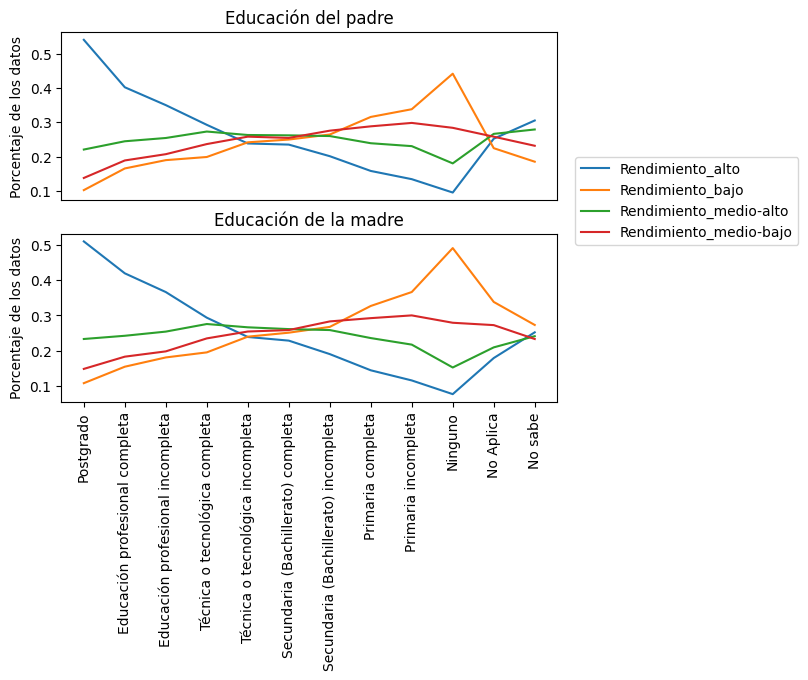

In [156]:
mp.subplot(2,1,1)
for i in range(4):
    mp.plot(educacion_labels,results_true[i],label = rendimiento_labels[i])

mp.xticks([])
mp.title("Educación del padre")
mp.ylabel("Porcentaje de los datos")

mp.subplot(2,1,2)
for i in range(4):
    mp.plot(educacion_labels,results_true_madre[i],label = rendimiento_labels[i])

mp.xticks(rotation=90)
mp.ylabel("Porcentaje de los datos")
mp.title("Educación de la madre")
mp.legend(bbox_to_anchor = (1.5,1.5), loc = 0)

mp.show()

Dado que los datos se comportan de manera símilar, para reducir los grados de libertad podemos unir los datos, haciendo el siguiente mapeo:
- Ambos con Educación profesional completa ---> (Padre_Educación profesional completa ```and``` Madre_Educación profesional completa)
- Uno con Educación profesional completa ---> (Padre_Educación profesional completa ```xor``` Madre_Educación profesional completa)
- Ambos con Educación profesional incompleta --> (Padre_Educación profesional incompleta ```and``` Madre_Educación profesional incompleta)
- Ambos Ninguno --> (Padre_Ninguno ```and``` Madre_Ninguno)
- Ambos No Aplica  --> (Padre_Ninguno ```and``` Madre_Ninguno)
- Ambos No sabe  --> (Padre_No sabe ```and``` Madre_No sabe)
- Ambos con Postgrado --> (Padre_con posgrado ```and``` Madre_con posgrado)
- Uno con Postgrado --> (Padre_con posgrado ```xor``` Madre_con posgrado)
- Ambos Primaria completa --> (Padre_Primaria completa ```and``` Madre_Primaria completa)
- Uno con Primaria completa --> (Padre_Primaria completa ```xor``` Madre_Primaria completa)
- Ambos con Primaria incompleta --> (Padre_Primaria incompleta ```and``` Madre_Primaria incompleta)
- Ambos con Secundaria completa --> (Padre_Secundaria completa ```and``` Madre_Secundaria completa)
- Uno con Secundaria completa --> (Padre_Secundaria completa ```xor``` Madre_Secundaria completa)
- Ambos con Secundaria incompleta --> (Padre_Secundaria incompleta ```and``` Madre_Secundaria incompleta)
- Ambos con Técnica o tecnológica completa --> (Padre_Técnica o tecnológica completa ```and``` Madre_Técnica o tecnológica completa)
- Uno con Técnica o tecnológica completa --> (Padre_Técnica o tecnológica completa ```xor``` Madre_Técnica o tecnológica completa)
- Ambos con Técnica o tecnológica incompleta --> (Padre_Técnica o tecnológica completa ```and``` Madre_Técnica o tecnológica completa)

In [157]:
new_cols_and = ['Ambos Padres con Postgrado',
            'Ambos Padres con Educación profesional completa',
            'Ambos Padres con Educación profesional incompleta',
            'Ambos Padres con Técnica o tecnológica completa',
            'Ambos Padres con Técnica o tecnológica incompleta',
            'Ambos Padres con Secundaria completa',
            'Ambos Padres con Secundaria incompleta',
            'Ambos Padres Primaria completa',
            'Ambos Padres con Primaria incompleta',
            'Ambos Padres Ninguno',
            'Ambos Padres No Aplica',
            'Ambos Padres No sabe']

new_cols_xor = ['Padre o Madre con Postgrado',
                'Padre o Madre con Educación profesional completa',
                'Padre o Madre con Técnica o tecnológica completa',
                'Padre o Madre con Secundaria completa',
                'Padre o Madre con Primaria completa']

new_cols = new_cols_and + new_cols_xor

completa = [0,1,3,5,7]

for i in range(len(new_cols_and)):
    train[new_cols_and[i]] = train[educacion_madre[i]] & train[educacion_padre[i]]

for i in range(len(new_cols_xor)):
    train[new_cols_xor[i]] = train[educacion_madre[completa[i]]] ^ train[educacion_padre[completa[i]]]
train[new_cols]

,Ambos Padres con Postgrado,Ambos Padres con Educación profesional completa,Ambos Padres con Educación profesional incompleta,Ambos Padres con Técnica o tecnológica completa,Ambos Padres con Técnica o tecnológica incompleta,Ambos Padres con Secundaria completa,Ambos Padres con Secundaria incompleta,Ambos Padres Primaria completa,Ambos Padres con Primaria incompleta,Ambos Padres Ninguno,Ambos Padres No Aplica,Ambos Padres No sabe,Padre o Madre con Postgrado,Padre o Madre con Educación profesional completa,Padre o Madre con Técnica o tecnológica completa,Padre o Madre con Secundaria completa,Padre o Madre con Primaria completa
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
692496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
692497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
692498,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [158]:
results_true_padres = [[ 0 for i in new_cols] for j in rendimiento]

for i in range(len(rendimiento)):
    for j in range(len(new_cols)):
        results_true_padres[i][j] = train[(train[new_cols[j]] == train[rendimiento[i]]) & train[rendimiento[i]]==1].shape[0]/train[train[new_cols[j]]==1].shape[0]

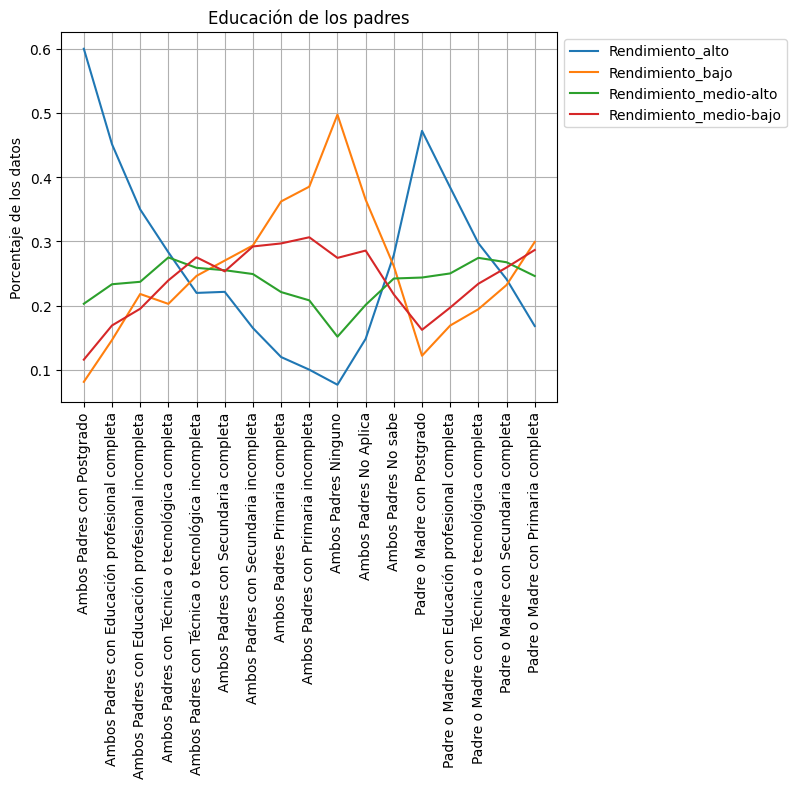

In [159]:
for i in range(4):
    mp.plot(new_cols,results_true_padres[i],label = rendimiento_labels[i])
mp.xticks(rotation=90)
mp.ylabel("Porcentaje de los datos")
mp.title("Educación de los padres")
mp.grid()
mp.legend(bbox_to_anchor = (1,1), loc = 0)

Estas nuevas columnas preservan la información que padre y madre tienen por separado, por tanto, podemos ignorar los datos por separado y quedarnos con estos nuevos datos, dado que los datos de train y test están relacionados, haremos lo mismo para los datos de test, como sigue.

In [160]:
for i in range(len(new_cols_and)):
    test[new_cols_and[i]] = test[educacion_madre[i]] & test[educacion_padre[i]]

for i in range(len(new_cols_xor)):
    test[new_cols_xor[i]] = test[educacion_madre[completa[i]]] ^ test[educacion_padre[completa[i]]]

test[new_cols]

,Ambos Padres con Postgrado,Ambos Padres con Educación profesional completa,Ambos Padres con Educación profesional incompleta,Ambos Padres con Técnica o tecnológica completa,Ambos Padres con Técnica o tecnológica incompleta,Ambos Padres con Secundaria completa,Ambos Padres con Secundaria incompleta,Ambos Padres Primaria completa,Ambos Padres con Primaria incompleta,Ambos Padres Ninguno,Ambos Padres No Aplica,Ambos Padres No sabe,Padre o Madre con Postgrado,Padre o Madre con Educación profesional completa,Padre o Madre con Técnica o tecnológica completa,Padre o Madre con Secundaria completa,Padre o Madre con Primaria completa
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
296782,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
296783,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
296784,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## C.2. Periodo de presentación

In [161]:
periodo_unico = train["PERIODO"].unique().tolist()
periodo_unico.sort()

porcentaje_true_periodo = [[0 for i in periodo_unico] for j in rendimiento]

for i in range(len(rendimiento)):
    for j in range(len(periodo_unico)):
        porcentaje_true_periodo[i][j] = train[(train["PERIODO"]== periodo_unico[j]) & train[rendimiento[i]]==1].shape[0]
        porcentaje_true_periodo[i][j] /=train[train["PERIODO"]== periodo_unico[j]].shape[0]

Los datos del periodo de presentación nos dan el siguiente comportamiento:

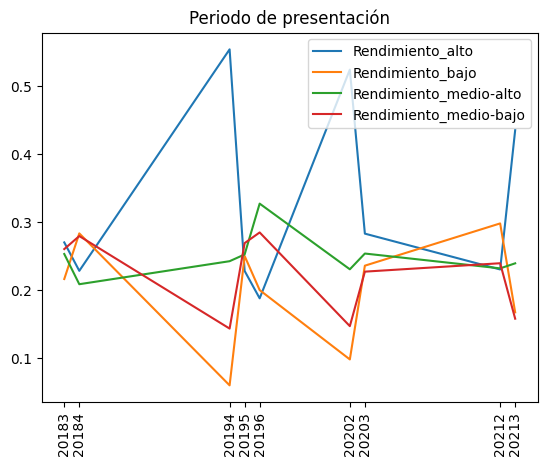

In [162]:
for i in range(4):
    mp.plot(periodo_unico,porcentaje_true_periodo[i],label = rendimiento_labels[i])

mp.xticks(periodo_unico, rotation=90)
mp.title("Periodo de presentación")
mp.legend()
mp.show()

Esta gŕafica tiene un comportamiento que no es predecible o esperable, parece tener un comportamiento más estocástico.

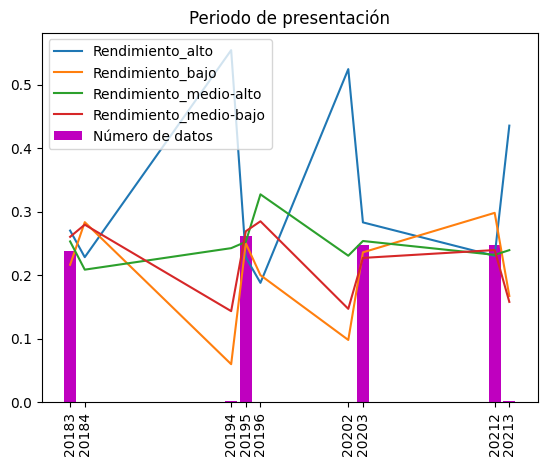

In [163]:
for i in range(4):
    mp.plot(periodo_unico,porcentaje_true_periodo[i],label = rendimiento_labels[i])

mp.xticks(periodo_unico, rotation=90)
mp.title("Periodo de presentación")
mp.legend()

num_of_data_per_period = []
for i in periodo_unico:
    num_of_data_per_period.append(train[train["PERIODO"]==i].shape[0]/train.shape[0])
mp.bar(periodo_unico, num_of_data_per_period, label = "Número de datos", color = "m")
mp.legend()

Sin embargo, cuando revisamos el número de datos que aportan por perido, vemos que los que tienen un comportamiento más irregular cuentan con menos datos, datos que pueden estár sesgados, por tanto los datos de la columna "PERIODO" no se tendrán en cuenta.

## C.3. Departamentos

In [164]:
departamentos = ['ESTU_PRGM_DEPARTAMENTO_AMAZONIA',
                 'ESTU_PRGM_DEPARTAMENTO_ANDINA',
                 'ESTU_PRGM_DEPARTAMENTO_CARIBE',
                 'ESTU_PRGM_DEPARTAMENTO_INSULAR',
                 'ESTU_PRGM_DEPARTAMENTO_ORINOQUIA',
                 'ESTU_PRGM_DEPARTAMENTO_PACIFICO']

results_true_departamentos = [[ 0 for i in departamentos] for j in rendimiento]

for i in range(len(rendimiento)):
    for j in range(len(departamentos)):
        results_true_departamentos[i][j] = train[(train[departamentos[j]] == train[rendimiento[i]]) & train[rendimiento[i]]==1].shape[0]/train[train[departamentos[j]] == 1 ].shape[0]

departamentos_labels = [i[23:len(i)] for i in departamentos]

Para hacer un análisis por regiones vemos lo siguiente:

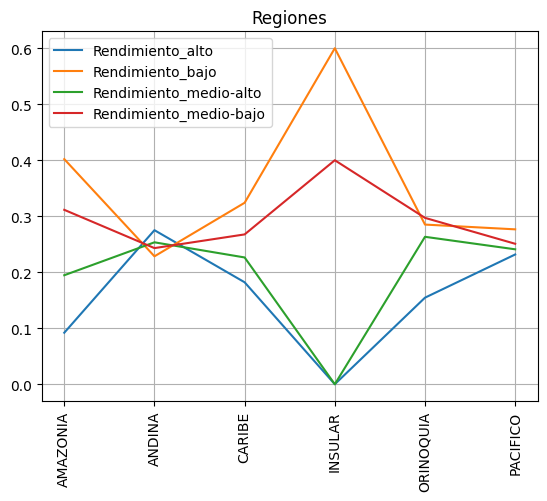

In [165]:
for i in range(4):
    mp.plot(departamentos_labels,results_true_departamentos[i],label = rendimiento_labels[i])

mp.xticks(rotation=90)
mp.title("Regiones")
mp.legend()
mp.grid()
mp.show()

Resultados que marcan la clara desigualdad del pís, siento las regiones Insular y Amazonía las más afectadas, mientras la región Ándina y Pacífica son las regiones que tienen una distribución más uniforme, donde los mejores resultados se obtienen en la región Ándina. De estos datos se tendrán en cuenta todas las columnas, pues sí es un factor diferencial para la clasificación.

## C.4. Valor de la matrícula

In [166]:
matricula_unico = train["ESTU_VALORMATRICULAUNIVERSIDAD"].unique().tolist()
matricula_unico.sort()

porcentaje_true_matricula = [[0 for i in matricula_unico] for j in rendimiento]

for i in range(len(rendimiento)):
    for j in range(len(matricula_unico)):
        porcentaje_true_matricula[i][j] = train[(train["ESTU_VALORMATRICULAUNIVERSIDAD"]== matricula_unico[j]) & train[rendimiento[i]]==1].shape[0]
        porcentaje_true_matricula[i][j] /=train[train["ESTU_VALORMATRICULAUNIVERSIDAD"]== matricula_unico[j]].shape[0]

En el valor de la matrícula se obtiene el siguiente comportamiento:

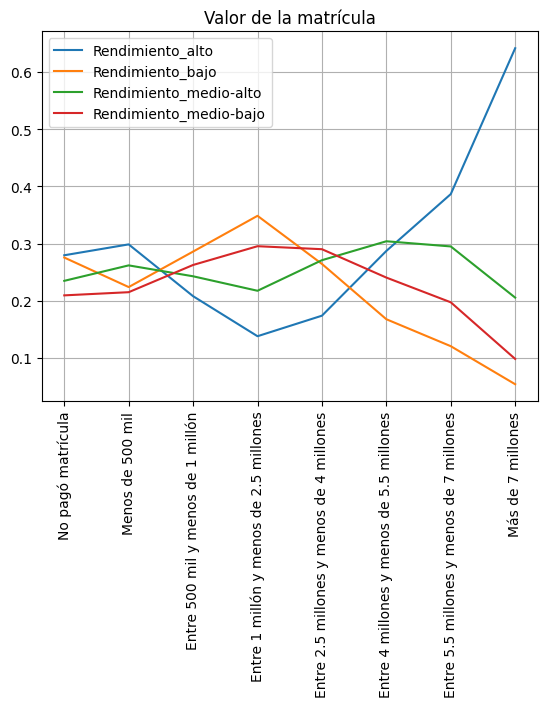

In [167]:
for i in range(4):
    mp.plot(list(valor_matricula_new_vals.keys()) ,porcentaje_true_matricula[i],label = rendimiento_labels[i])

mp.xticks(list(valor_matricula_new_vals.keys()), rotation=90)
mp.title("Valor de la matrícula")
mp.legend()
mp.grid()
mp.show()

## C.5. Horas de trabajo a la semana

In [168]:
horas_unico = train["ESTU_HORASSEMANATRABAJA"].unique().tolist()
horas_unico.sort()

porcentaje_true_horas = [[0 for i in horas_unico] for j in rendimiento]

for i in range(len(rendimiento)):
    for j in range(len(horas_unico)):
        porcentaje_true_horas[i][j] = train[(train["ESTU_HORASSEMANATRABAJA"]== horas_unico[j]) & train[rendimiento[i]]==1].shape[0]
        porcentaje_true_horas[i][j] /=train[train["ESTU_HORASSEMANATRABAJA"]== horas_unico[j]].shape[0]

Las horas que trabaja el estudiante en la semana influye en el rendimiento de la siguiente manera:

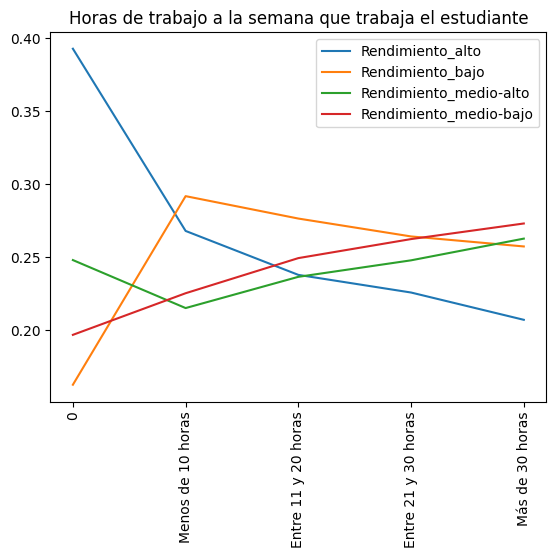

In [169]:
for i in range(4):
    mp.plot(list(valor_horas_trabajo_new_vals.keys()),porcentaje_true_horas[i],label = rendimiento_labels[i])

mp.xticks(list(valor_horas_trabajo_new_vals.keys()), rotation=90)
mp.title("Horas de trabajo a la semana que trabaja el estudiante")
mp.legend()
mp.show()

Donde claramente, el trabajo sí interfiere en las actividades académicas de un estudiante.

## C.6. Estrato

In [170]:
estrato_unico = train["FAMI_ESTRATOVIVIENDA"].unique().tolist()
estrato_unico.sort()

porcentaje_true_estrato = [[0 for i in estrato_unico] for j in rendimiento]

for i in range(len(rendimiento)):
    for j in range(len(estrato_unico)):
        porcentaje_true_estrato[i][j] = train[(train["FAMI_ESTRATOVIVIENDA"]== estrato_unico[j]) & train[rendimiento[i]]==1].shape[0]
        porcentaje_true_estrato[i][j] /=train[train["FAMI_ESTRATOVIVIENDA"]== estrato_unico[j]].shape[0]

El estrato de la vivienda del estudiante refleja el siguiente comportamiento:

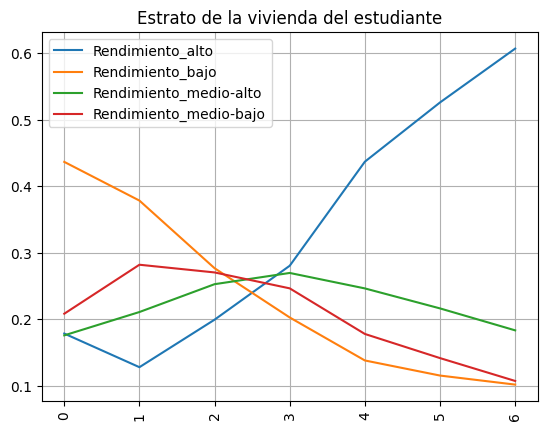

In [171]:
for i in range(4):
    mp.plot(estrato_unico,porcentaje_true_estrato[i],label = rendimiento_labels[i])

mp.xticks(estrato_unico, rotation=90)
mp.title("Estrato de la vivienda del estudiante")
mp.legend()
mp.grid()
mp.show()

El cual es muy concluyente, conforme mejor estrato se tiene, mejores probabilidades de obtener rendimiento alto.

## C.7. Variables con valor de sí o no

In [172]:
categorias_bool = ['FAMI_TIENEINTERNET',
                   'FAMI_TIENELAVADORA',
                   'FAMI_TIENEAUTOMOVIL',
                   'ESTU_PAGOMATRICULAPROPIO',
                   'FAMI_TIENECOMPUTADOR',
                   'ESTU_PRIVADO_LIBERTAD']

results_bool_true = [[0 for j in categorias_bool] for i in rendimiento]

for i in range(len(rendimiento)):
    for j in range(len(categorias_bool)):
        results_bool_true[i][j] = train[(train[categorias_bool[j]] == 1) & (train[rendimiento[i]]==1)].shape[0]/train[train[categorias_bool[j]] == 1].shape[0]

categorias_labels = [ i[5:len(i)] for i in categorias_bool]

Finalmente, para las veriables de tipo sí y no, cuando la respuesta es sí (por ejemplo, en las gráficas se tienen las probabilidades de obtener dicho resultado dado que sí tiene computador), reflejan lo siguiente sobre los datos:

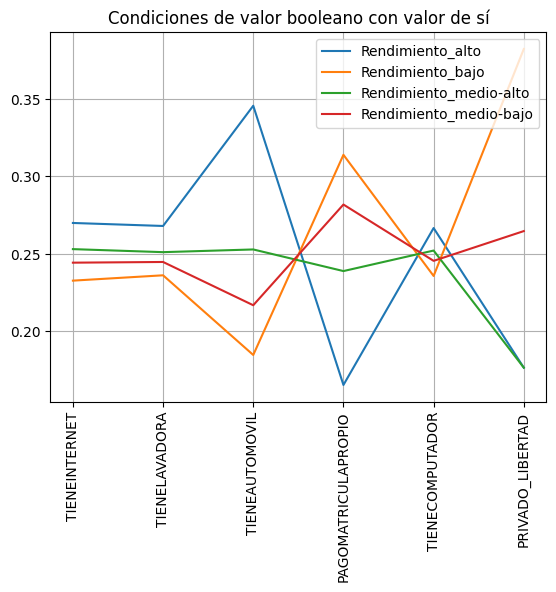

In [173]:
for i in range(4):
    mp.plot(categorias_labels, results_bool_true[i],label = rendimiento_labels[i])

mp.xticks(rotation=90)
mp.title("Condiciones de valor booleano con valor de sí")
mp.legend()
mp.grid()
mp.show()

Para cada uno de los datos se tiene lo siguiente:
- Cada estudiante que tiene internet en casa presenta una mayor probabilidad a tener un buen desempeño en las pruebas.
- Cada estudiante que tiene lavadora en la casa presenta una mayor probabilidad a tener un buen desempeño.
- Cada estudiante que tiene automovil en casa presenta una mayor probabilidad de obtener mejores resultados, sin embargo, se vé que hay un máximo de probabilidad, es decir, es más determinante que los anteriores.
- Cada estudiante que paga su propia matrícula tiene una umayor probabilidad de obtener un rendimiento bajo, seguido de un rendimiento medio-alto, esto puede estar relacionado con los resultados obtenidos con las horas de trabajo.
- Los estudiantes con computador vuelven al comportamiento anterior, pues tienen una mayor probabilidad de obtener una mejor rendimiento.
- Finalmente, los estudiantes privados de su libertad son los que pero rendimiento obtienen, esto puede ser producto de una falta de condiciones académicas que reciben.

## C.8. Conclusiones y data Frames para implementación del modelo de train y test

### C.8.1. Análisis de los datos

Se realizó el análisis para cada uno de los valores aportados para cada estudiante, determinando lo siguiente:
- La educación de los padres afecta al rendimiento del estudiante en la presentación de la prueba, independiente de si es padre o si es madre.
- El periodo de presentación es un dato que no importa mucho en la determinación del rendimiento del estudiante.
- La división por regiones de los departamentos muestra que sí influye en los resultados de los estudiantes, sin embargo hay algunas regiones que tienen una distribución más equiprobable. No solo muestra una probabilidad sobre los estudiantes sino una condición de desigualdad en el país.
- El valor de la matrícula también afecta el desempeño de los estudiantes en las pruebas, pues los mejores resultados se encuentran en los extremos de los datos, es decir, estudiantes con matrículas por debajo de los 500mil y arriba de los 5.5 millones.
- Sí existe una diferencia entre los estudiantes que desempeñan actividades laborales, obteniendo un menor desempeño conforme mayor horas laborales a la semana hay.
- El estrato social afecta a los estudiantes, mostrando que a mayor estrato, mejor rendimiento.
- De las variables con valores booleanos, se muestra que los privilegios sí tienen influencia sobre el resultado de los estudiantes.

Es por ello, que los valores que se usarán para el modelo serán los siguientes:
- Educación de los Padres:
    - Ambos con Educación profesional completa
    - Uno con Educación profesional completa
    - Ambos con Educación profesional incompleta
    - Ambos Ninguno
    - Ambos No Aplica
    - Ambos No sabe
    - Ambos con Postgrado
    - Uno con Postgrado
    - Ambos Primaria completa
    - Uno con Primaria completa
    - Ambos con Primaria incompleta
    - Ambos con Secundaria completa
    - Uno con Secundaria completa
    - Ambos con Secundaria incompleta
    - Ambos con Técnica o tecnológica completa
    - Uno con Técnica o tecnológica completa
    - Ambos con Técnica o tecnológica incompleta
- Regiones:
    - AMAZONIA
    - ANDINA
    - CARIBE
    - INSULAR
    - ORINOQUIA
    - PACIFICO
- Valor de la matrícula
- Horas de trabajo a la semana
- Estrato
- TIENEINTERNET
- TIENELAVADORA
- TIENEAUTOMOVIL
- PAGOMATRICULAPROPIO
- TIENECOMPUTADOR
- PRIVADO LIBERTAD

In [174]:
relevant_data = ["ID"]+ new_cols + departamentos + ["ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_HORASSEMANATRABAJA","FAMI_ESTRATOVIVIENDA"]
relevant_data += categorias_bool
final_train = train[relevant_data+rendimiento]
final_train.head(10)

,ID,Ambos Padres con Postgrado,Ambos Padres con Educación profesional completa,Ambos Padres con Educación profesional incompleta,Ambos Padres con Técnica o tecnológica completa,Ambos Padres con Técnica o tecnológica incompleta,Ambos Padres con Secundaria completa,Ambos Padres con Secundaria incompleta,Ambos Padres Primaria completa,Ambos Padres con Primaria incompleta,...,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,ESTU_PRIVADO_LIBERTAD,RENDIMIENTO_GLOBAL_alto,RENDIMIENTO_GLOBAL_bajo,RENDIMIENTO_GLOBAL_medio-alto,RENDIMIENTO_GLOBAL_medio-bajo
0,904256,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,1,0
1,645256,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,308367,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3,470353,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
4,989032,0,0,0,0,0,0,0,1,0,...,1,1,1,0,1,0,0,0,0,1
5,659872,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,1,0
6,47159,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,0,0,0
7,11829,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
8,257869,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
9,465511,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,0,0,0


In [175]:
final_test = test[relevant_data]
final_test.head(10)

,ID,Ambos Padres con Postgrado,Ambos Padres con Educación profesional completa,Ambos Padres con Educación profesional incompleta,Ambos Padres con Técnica o tecnológica completa,Ambos Padres con Técnica o tecnológica incompleta,Ambos Padres con Secundaria completa,Ambos Padres con Secundaria incompleta,Ambos Padres Primaria completa,Ambos Padres con Primaria incompleta,...,ESTU_PRGM_DEPARTAMENTO_PACIFICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,ESTU_PRIVADO_LIBERTAD
0,550236,0,0,0,0,0,0,0,0,0,...,0,1,1,3,1,1,0,1,1,0
1,98545,0,0,0,0,0,0,0,0,0,...,0,4,3,2,1,1,0,0,1,0
2,499179,0,0,0,0,0,0,0,0,0,...,0,3,0,3,1,1,0,0,1,0
3,782980,0,0,0,0,0,0,0,0,1,...,0,3,3,1,0,1,0,0,0,0
4,785185,0,0,0,0,0,1,0,0,0,...,0,4,2,2,1,1,0,0,1,0
5,58495,0,0,0,0,0,0,0,0,0,...,1,2,4,1,1,1,0,1,1,0
6,705444,0,0,0,0,0,0,0,0,0,...,0,1,0,3,1,1,1,0,1,0
7,557548,1,0,0,0,0,0,0,0,0,...,0,7,1,4,1,1,1,0,1,0
8,519909,0,0,0,0,0,1,0,0,0,...,0,3,3,2,0,1,0,0,1,0
9,832058,0,0,0,0,0,0,0,0,0,...,0,2,3,2,1,1,0,0,1,0


### C.8.2. Comportamiento de los datos seleccionados

Para corroborar el comportamiento de los datos en conjunto se realiza el siguiente análisis:

Primero, se realiza una gráfica de las probabilidades de cada dato para obtener cada rendimiento, luego se calcula la entropía de Shanon, definida como

$$S_i = -\sum\limits_\text{rendimientos} (p_{rendimiento = 1}\ln(p_{rendimiento = 1})+(1-p_{rendimiento = 1})\ln(1-p_{rendimiento = 1})),$$

donde $i$ es cada uno de los datos que elegimos como relevantes. Se obtuvieron los siguientes resultados:

<ipython-input-176-dcb60237d314>:5: RuntimeWarning: divide by zero encountered in log
  entropy = np.mean(-values*np.log(values)-((1-values)*np.log(1-values)), axis = 0)
<ipython-input-176-dcb60237d314>:5: RuntimeWarning: invalid value encountered in multiply
  entropy = np.mean(-values*np.log(values)-((1-values)*np.log(1-values)), axis = 0)


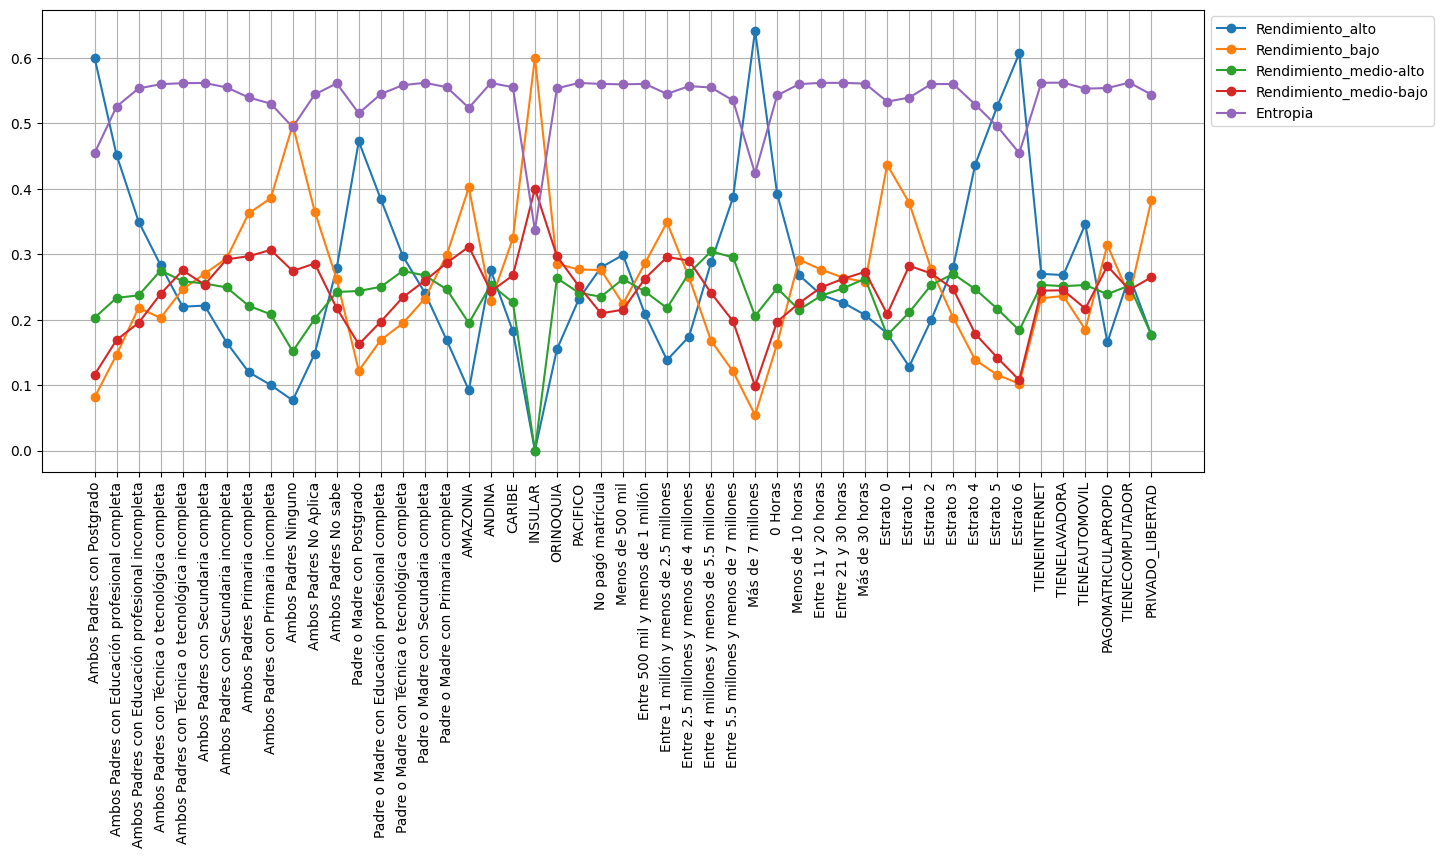

In [176]:
x_values = new_cols+departamentos_labels+list(valor_matricula_new_vals.keys())+["0 Horas"]+list(valor_horas_trabajo_new_vals.keys())[1:5]+[f"Estrato {i}" for i in estrato_unico]+categorias_labels

values = np.array([results_true_padres[i]+results_true_departamentos[i]+porcentaje_true_matricula[i]+porcentaje_true_horas[i]+porcentaje_true_estrato[i]+results_bool_true[i] for i in range(4)])

entropy = np.mean(-values*np.log(values)-((1-values)*np.log(1-values)), axis = 0)
entropy[20] = np.mean([0,0, -(0.4*np.log(0.4)+0.6*np.log(0.6)),-(0.4*np.log(0.4)+0.6*np.log(0.6))])

mp.figure(figsize=(15,6))
mp.grid()

for j in range(4):
  mp.plot(x_values, values[j], label = rendimiento_labels[j], marker = "o")
mp.plot(x_values, entropy, marker = "o", label = "Entropia")

mp.legend(bbox_to_anchor = (1,1))
mp.xticks(rotation = 90)
mp.show()

La entropía se tiene a continuación:

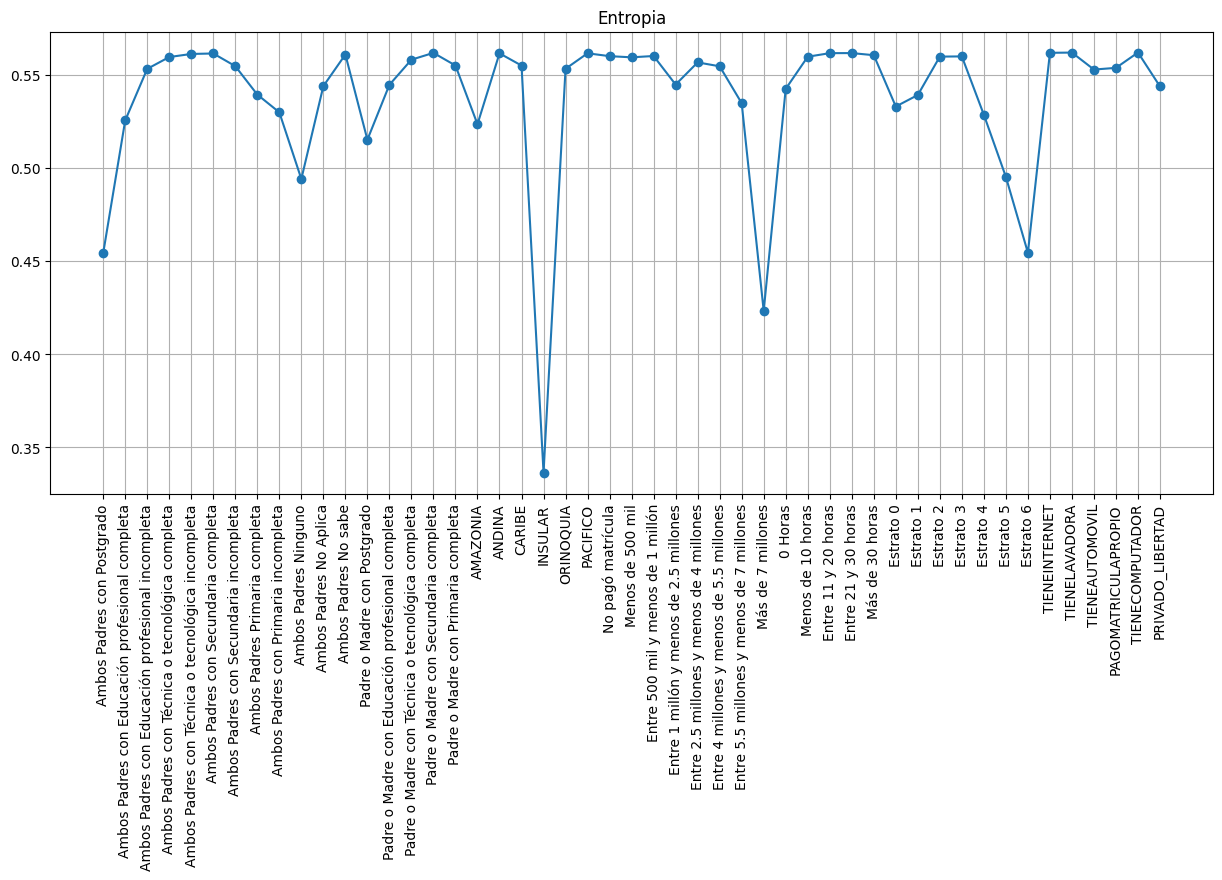

In [177]:
mp.figure(figsize=(15,6))

mp.plot(x_values, entropy, marker = "o")
mp.title("Entropia")
mp.grid()
mp.xticks(rotation = 90)
mp.show()

Seleccionando un umbral arbitrario y se seleccionan los valores con entropía menor, donde se tienen los siguientes datos:

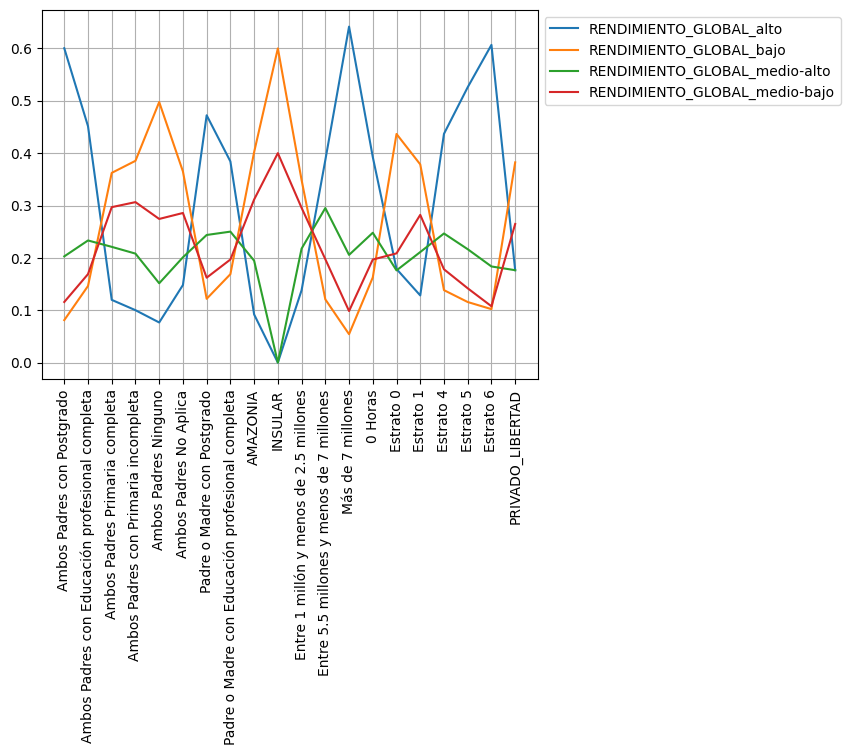

In [178]:
entropy_lim = 0.55

a ,b = [],[[],[],[],[]]

for i in range(len(entropy)):
  if entropy[i] <= entropy_lim:
    a.append(x_values[i])
    b[0].append(values[0][i])
    b[1].append(values[1][i])
    b[2].append(values[2][i])
    b[3].append(values[3][i])

for i in range(4):
  mp.plot(a,b[i], label = rendimiento[i])
mp.legend(bbox_to_anchor = (1,1))
mp.xticks(rotation = 90)
mp.grid()

In [179]:
train.loc[(train["FAMI_ESTRATOVIVIENDA"] == 2) | (train["FAMI_ESTRATOVIVIENDA"] == 3), "FAMI_ESTRATOVIVIENDA"] = 2
train.loc[(train["ESTU_VALORMATRICULAUNIVERSIDAD"] != 3) & (train["ESTU_VALORMATRICULAUNIVERSIDAD"] != 5) & (train["ESTU_VALORMATRICULAUNIVERSIDAD"] != 6), "ESTU_VALORMATRICULAUNIVERSIDAD"] = 0
train.loc[train["ESTU_HORASSEMANATRABAJA"]!=0,"ESTU_HORASSEMANATRABAJA"] = 1

Por tanto los datos relevantes son:

In [181]:
educacion_padres = ['Ambos Padres con Postgrado',
                   'Ambos Padres con Educación profesional completa',
                   'Ambos Padres Primaria completa',
                   'Ambos Padres con Primaria incompleta',
                   'Ambos Padres Ninguno',
                   'Ambos Padres No Aplica',
                   'Padre o Madre con Postgrado',
                   'Padre o Madre con Educación profesional completa']

departamentos_final = ['ESTU_PRGM_DEPARTAMENTO_AMAZONIA',
                       'ESTU_PRGM_DEPARTAMENTO_INSULAR']

otros = ["ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_HORASSEMANATRABAJA","FAMI_ESTRATOVIVIENDA"]

relevant_data = ["ID"]+educacion_padres + departamentos_final + otros + [categorias_bool[-1]]
relevant_data

['ID',
 'Ambos Padres con Postgrado',
 'Ambos Padres con Educación profesional completa',
 'Ambos Padres Primaria completa',
 'Ambos Padres con Primaria incompleta',
 'Ambos Padres Ninguno',
 'Ambos Padres No Aplica',
 'Padre o Madre con Postgrado',
 'Padre o Madre con Educación profesional completa',
 'ESTU_PRGM_DEPARTAMENTO_AMAZONIA',
 'ESTU_PRGM_DEPARTAMENTO_INSULAR',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'ESTU_PRIVADO_LIBERTAD']

# D. Modelo

El modelo que se usará para la predicción del modelo será un modelo de redes neuronales, este será estudiado a continuación y en los índices siguientes.

## D.1. Redes neuronales

### D.1.1. Función generadora del modelo

Para el modelo se usará una red neuronal de capas densas típica de tensor flow, se define el modelo según la siguiente función:

In [182]:
def get_model(input_shape, learning_rate, layers_num, layers_neurons=[], layers_activations=[], activation_function = 'sigmoid', num_for_layers = 10):
    if len(layers_neurons) == 0:
        layers_neurons = [num_for_layers for i in range(layers_num)]
    if len(layers_activations) == 0:
        layers_activations = [activation_function for i in range(layers_num)]

    alert_text = "Los tamaños en las activaciones o número de neuronas por capas no coinciden con el número de capas"
    assert layers_num == len(layers_neurons) and layers_num == len(layers_activations) , alert_text

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape = input_shape))

    for i in range(layers_num):
        model.add(tf.keras.layers.Dense(units = layers_neurons[i], activation = layers_activations[i]))

    model.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))

    model.loss = tf.keras.losses.CategoricalCrossentropy()
    model.optimizer = tf.keras.optimizers.RMSprop(learning_rate = learning_rate)

    return model

### D.1.2. Separación de los datos

Para la calibración del modelo se usará un 70% de los datos para entrenamiento y un 30% de los datos para evaluación del modelo.

In [183]:
X = final_train[relevant_data[1:len(relevant_data)]]
Y = train[rendimiento]

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify = Y)

In [185]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.int64)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)
X_test = tf.convert_to_tensor(X_test, dtype=tf.int64)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int64)

### D.1.3. Prueba del modelo

A continuación se muestra el funcionamiento y montaje de un modelo simple de 1 capa con 10 neuronas y un learning rate de 0.01:

In [186]:
model = get_model(X.shape[1], 0.001, 1, activation_function = "exponential", num_for_layers = 10)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 194 (776.00 Byte)
Trainable params: 194 (776.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


El ajuste del modelo se hace a continuación:

In [187]:
model.compile(model.optimizer, model.loss, metrics = ["accuracy"])
model.fit(X_train, y_train, epochs=10, verbose = 2)

Epoch 1/10
15149/15149 - 24s - loss: 1.3089 - accuracy: 0.3667 - 24s/epoch - 2ms/step
Epoch 2/10
15149/15149 - 33s - loss: 1.2953 - accuracy: 0.3722 - 33s/epoch - 2ms/step
Epoch 3/10
15149/15149 - 30s - loss: 1.2953 - accuracy: 0.3712 - 30s/epoch - 2ms/step
Epoch 4/10
15149/15149 - 29s - loss: 1.2955 - accuracy: 0.3726 - 29s/epoch - 2ms/step
Epoch 5/10
15149/15149 - 32s - loss: 1.2960 - accuracy: 0.3718 - 32s/epoch - 2ms/step
Epoch 6/10
15149/15149 - 33s - loss: 1.2960 - accuracy: 0.3713 - 33s/epoch - 2ms/step
Epoch 7/10
15149/15149 - 31s - loss: 1.2958 - accuracy: 0.3704 - 31s/epoch - 2ms/step
Epoch 8/10
15149/15149 - 32s - loss: 1.2955 - accuracy: 0.3723 - 32s/epoch - 2ms/step
Epoch 9/10
15149/15149 - 32s - loss: 1.2957 - accuracy: 0.3727 - 32s/epoch - 2ms/step
Epoch 10/10
15149/15149 - 26s - loss: 1.2956 - accuracy: 0.3725 - 26s/epoch - 2ms/step


In [188]:
print(model.evaluate(X_train, y_train, verbose = 0))
print(model.evaluate(X_test, y_test, verbose = 0))

[1.2946338653564453, 0.3694894313812256]
[1.293699026107788, 0.3730108439922333]


# E. Exploración de hiperparámetros

## E.0. Funciones de python

Las funciones necesarias para correr esta sección del código se ven a continuación:

In [189]:
def test_accuracy(X_test, y_test, model):
  return model.evaluate(X_train, y_train, verbose = 0)[1], model.evaluate(X_test, y_test, verbose = 0)[1]

def train_model(X_train, y_train, model, epochs=10, verbose = 2):
  model.compile(model.optimizer, model.loss, metrics = ["accuracy"])
  model.fit(X_train, y_train, epochs=epochs, verbose = verbose)

def get_model(input_shape, learning_rate, layers_num, layers_neurons=[], layers_activations=[], activation_function = 'sigmoid', num_for_layers = 10):

    if len(layers_neurons) == 0:
        layers_neurons = [num_for_layers for i in range(layers_num)]
    if len(layers_activations) == 0:
        layers_activations = [activation_function for i in range(layers_num)]

    alert_text = "Los tamaños en las activaciones o número de neuronas por capas no coinciden con el número de capas"
    assert layers_num == len(layers_neurons) and layers_num == len(layers_activations) , alert_text

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape = input_shape))

    for i in range(layers_num):
        model.add(tf.keras.layers.Dense(units = layers_neurons[i], activation = layers_activations[i]))

    model.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))

    model.loss = tf.keras.losses.CategoricalCrossentropy()
    model.optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

    return model

def plot(x_data, y_data, label, title="", bbox_to_anchor = (1,1), figsize = (8,6), ticks_rotation = 90, grid = True, xlabel="", ylabel=""):
  mp.figure(figsize = figsize)
  for i in range(len(x_data)):
    mp.plot(x_data[i], y_data[i], label = label[i])
  mp.title(title)
  mp.legend(bbox_to_anchor = bbox_to_anchor)
  mp.xticks(rotation = ticks_rotation)
  mp.grid(grid)
  mp.xlabel(xlabel)
  mp.ylabel(ylabel)
  mp.show()

## E.1. Número de capas

Para el parámetro de número de capas probaremos modelos de hasta 5 capas con 10 neuronas cada capa, para ello se tiene lo siguiente:

In [191]:
num_of_layers = [i+1 for i in range(5)]
test_accuracy_per_layers = []
train_accuracy_per_layers = []

for i in num_of_layers:
  model = get_model(X_train.shape[1], 0.01, i)
  train_model(X_train, y_train, model)
  accuracies = test_accuracy(X_test,y_test, model)
  test_accuracy_per_layers.append(accuracies[1])
  train_accuracy_per_layers.append(accuracies[0])
  print(str(i)+" layers evaluated")

Epoch 1/10
15149/15149 - 32s - loss: 1.3004 - accuracy: 0.3661 - 32s/epoch - 2ms/step
Epoch 2/10
15149/15149 - 33s - loss: 1.2897 - accuracy: 0.3753 - 33s/epoch - 2ms/step
Epoch 3/10
15149/15149 - 24s - loss: 1.2895 - accuracy: 0.3761 - 24s/epoch - 2ms/step
Epoch 4/10
15149/15149 - 22s - loss: 1.2889 - accuracy: 0.3768 - 22s/epoch - 1ms/step
Epoch 5/10
15149/15149 - 24s - loss: 1.2885 - accuracy: 0.3764 - 24s/epoch - 2ms/step
Epoch 6/10
15149/15149 - 24s - loss: 1.2886 - accuracy: 0.3765 - 24s/epoch - 2ms/step
Epoch 7/10
15149/15149 - 24s - loss: 1.2882 - accuracy: 0.3760 - 24s/epoch - 2ms/step
Epoch 8/10
15149/15149 - 24s - loss: 1.2882 - accuracy: 0.3760 - 24s/epoch - 2ms/step
Epoch 9/10
15149/15149 - 24s - loss: 1.2882 - accuracy: 0.3760 - 24s/epoch - 2ms/step
Epoch 10/10
15149/15149 - 22s - loss: 1.2883 - accuracy: 0.3763 - 22s/epoch - 1ms/step
1 layers evaluated
Epoch 1/10
15149/15149 - 25s - loss: 1.2960 - accuracy: 0.3696 - 25s/epoch - 2ms/step
Epoch 2/10
15149/15149 - 25s - los

La gráfica del accuracy del modelo respecto del número de capa se muestra a continuación:

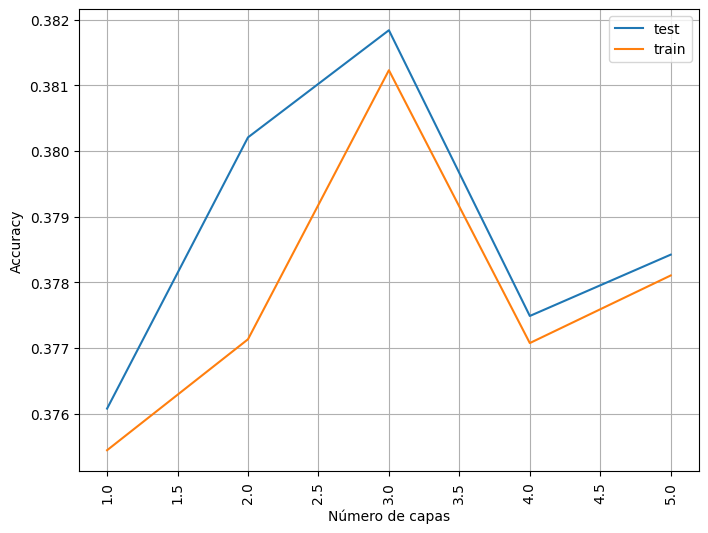

In [192]:
plot([num_of_layers,num_of_layers], [test_accuracy_per_layers,train_accuracy_per_layers], label=["test", "train"], ylabel = "Accuracy", xlabel = "Número de capas")

El mejor número de capas para el modelo, según los datos de entrenamiento es el siguiente:

In [193]:
layers = num_of_layers[test_accuracy_per_layers.index(np.max(test_accuracy_per_layers))]
layers

3

Dado que no hay una mejora significativa con el número de capas, se tomatá 1 capa intermedia, pues es la que agiliza el entrenamiento y las evaluaciones del modelo.

## E.2. Número de neuronas por capa

Para el número de neuronas por capa se usará el número de capas obtenido anteriormente, se usará un número fijo de neuronas entre 10 y 50 por capas, esto se ve a continuación:

In [194]:
num_of_neurons = [(i+1)*10 for i in range(5)]
test_accuracy_per_neurons = []
train_accuracy_per_neurons = []

for i in num_of_neurons:
  model = get_model(X_train.shape[1], 0.01, layers, num_for_layers = i)
  train_model(X_train, y_train, model)
  accuracies = test_accuracy(X_test,y_test, model)
  test_accuracy_per_neurons.append(accuracies[1])
  train_accuracy_per_neurons.append(accuracies[0])
  print(str(i)+" neurons per layer evaluated")

Epoch 1/10
15149/15149 - 27s - loss: 1.2980 - accuracy: 0.3668 - 27s/epoch - 2ms/step
Epoch 2/10
15149/15149 - 27s - loss: 1.2893 - accuracy: 0.3764 - 27s/epoch - 2ms/step
Epoch 3/10
15149/15149 - 29s - loss: 1.2877 - accuracy: 0.3779 - 29s/epoch - 2ms/step
Epoch 4/10
15149/15149 - 27s - loss: 1.2871 - accuracy: 0.3775 - 27s/epoch - 2ms/step
Epoch 5/10
15149/15149 - 27s - loss: 1.2867 - accuracy: 0.3776 - 27s/epoch - 2ms/step
Epoch 6/10
15149/15149 - 26s - loss: 1.2863 - accuracy: 0.3787 - 26s/epoch - 2ms/step
Epoch 7/10
15149/15149 - 26s - loss: 1.2862 - accuracy: 0.3781 - 26s/epoch - 2ms/step
Epoch 8/10
15149/15149 - 26s - loss: 1.2861 - accuracy: 0.3786 - 26s/epoch - 2ms/step
Epoch 9/10
15149/15149 - 27s - loss: 1.2859 - accuracy: 0.3795 - 27s/epoch - 2ms/step
Epoch 10/10
15149/15149 - 27s - loss: 1.2859 - accuracy: 0.3779 - 27s/epoch - 2ms/step
10 neurons per layer evaluated
Epoch 1/10
15149/15149 - 28s - loss: 1.2958 - accuracy: 0.3705 - 28s/epoch - 2ms/step
Epoch 2/10
15149/15149

La gráfica del accuracy del modelo respecto del número de neuronas por capa se ve a continuación:

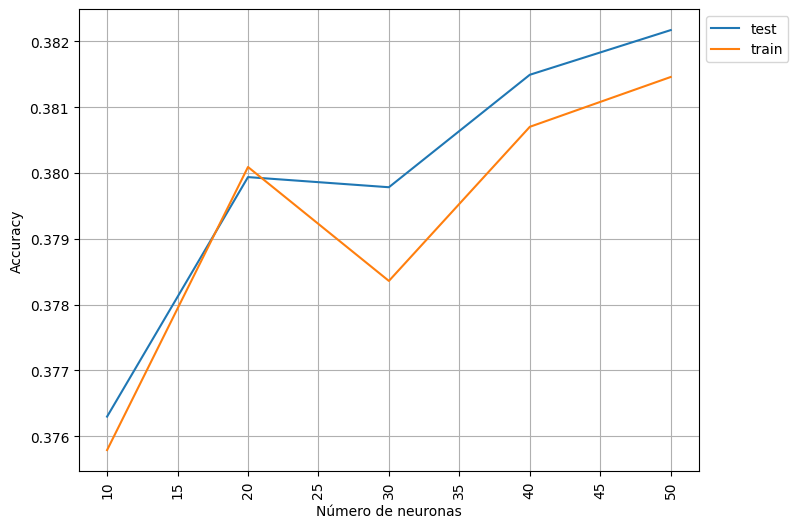

In [195]:
plot([num_of_neurons,num_of_neurons], [test_accuracy_per_neurons,train_accuracy_per_neurons], label=["test", "train"], ylabel = "Accuracy", xlabel = "Número de neuronas")

El número de neuronas óptimo se ve a continuación:

In [196]:
neurons = num_of_neurons[test_accuracy_per_neurons.index(np.max(test_accuracy_per_neurons))]
neurons

50

## E.3. Función de activación

Se usarán 5 funciones de activación diferentes, estas son
- Relu
- Sigmoide
- Softplus
- Tangente hiperbólica
- Selu

Estas fueron seleccionadas arbitrariamente teniendo en cuenta que no fueran nulas en x = 0.

In [197]:
activation_functions = ['relu', 'sigmoid', 'softplus', 'tanh', 'selu']
test_accuracy_activations = []
train_accuracy_activations = []

for i in activation_functions:
  model = get_model(X_train.shape[1], 0.01, layers, num_for_layers = neurons, activation_function = i)
  train_model(X_train, y_train, model)
  accuracies = test_accuracy(X_test,y_test, model)
  test_accuracy_activations.append(accuracies[1])
  train_accuracy_activations.append(accuracies[0])
  print(i+" evaluated")

Epoch 1/10
15149/15149 - 29s - loss: 1.2981 - accuracy: 0.3672 - 29s/epoch - 2ms/step
Epoch 2/10
15149/15149 - 28s - loss: 1.2941 - accuracy: 0.3706 - 28s/epoch - 2ms/step
Epoch 3/10
15149/15149 - 28s - loss: 1.2928 - accuracy: 0.3728 - 28s/epoch - 2ms/step
Epoch 4/10
15149/15149 - 28s - loss: 1.2927 - accuracy: 0.3732 - 28s/epoch - 2ms/step
Epoch 5/10
15149/15149 - 28s - loss: 1.2929 - accuracy: 0.3708 - 28s/epoch - 2ms/step
Epoch 6/10
15149/15149 - 28s - loss: 1.2926 - accuracy: 0.3716 - 28s/epoch - 2ms/step
Epoch 7/10
15149/15149 - 28s - loss: 1.2925 - accuracy: 0.3713 - 28s/epoch - 2ms/step
Epoch 8/10
15149/15149 - 27s - loss: 1.2926 - accuracy: 0.3717 - 27s/epoch - 2ms/step
Epoch 9/10
15149/15149 - 28s - loss: 1.2924 - accuracy: 0.3711 - 28s/epoch - 2ms/step
Epoch 10/10
15149/15149 - 27s - loss: 1.2924 - accuracy: 0.3716 - 27s/epoch - 2ms/step
relu evaluated
Epoch 1/10
15149/15149 - 29s - loss: 1.2962 - accuracy: 0.3705 - 29s/epoch - 2ms/step
Epoch 2/10
15149/15149 - 28s - loss: 1

La gráfica para cada función de activación se ve a continuación:

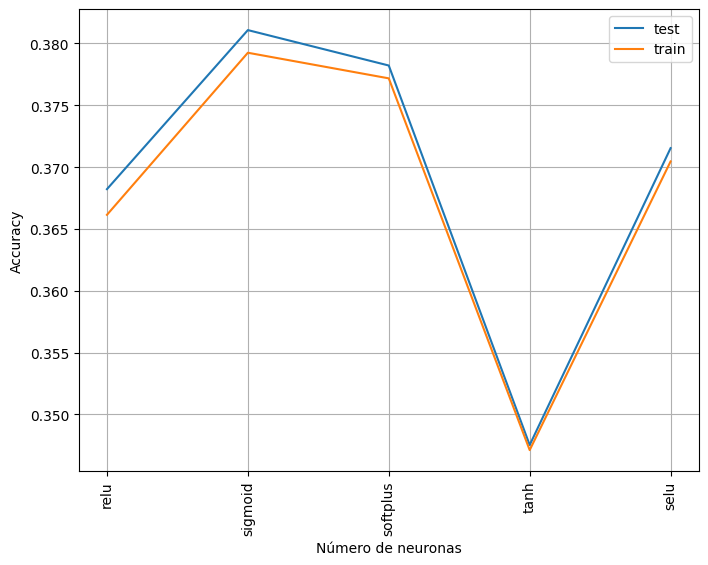

In [198]:
plot([activation_functions,activation_functions], [test_accuracy_activations,train_accuracy_activations], label=["test", "train"], ylabel = "Accuracy", xlabel = "Número de neuronas")

La mejor función de activación será la siguiente:

In [199]:
activation = activation_functions[test_accuracy_activations.index(np.max(test_accuracy_activations))]
activation

'sigmoid'

## E.4. Learning rate

Finalmente, para el learning rate se usaron los valores de 0.1, 0.01, 0.001, 0.0001 y 0.00001, con lo cual:

In [200]:
lr = [10**(-1*(i+1)) for i in range(5)]
test_accuracy_lr = []
train_accuracy_lr = []

for i in lr:
  model = get_model(X_train.shape[1], learning_rate = i, layers_num = layers, num_for_layers = neurons, activation_function = activation)
  train_model(X_train, y_train, model)
  accuracies = test_accuracy(X_test,y_test, model)
  test_accuracy_lr.append(accuracies[1])
  train_accuracy_lr.append(accuracies[0])
  print(str(i)+" learning rate evaluated")

Epoch 1/10
15149/15149 - 29s - loss: 1.3941 - accuracy: 0.2492 - 29s/epoch - 2ms/step
Epoch 2/10


KeyboardInterrupt: ignored

El comportamiento del accuracy se ve a continuación:

In [ ]:
plot([lr,lr], [test_accuracy_lr,train_accuracy_lr], label=["test", "train"], ylabel = "Accuracy", xlabel = "learning rate")

El mejor learning_rate será:

In [ ]:
learning_rate = lr[test_accuracy_lr.index(np.max(test_accuracy_lr))]
learning_rate

### E.5. Conclusiones

Los valores seleccionados para el modelo final serán:

In [202]:
model_params = [learning_rate, layers, neurons, activation]
nombres = ['learning rate: ', "Número de capas: ", 'número de neuronas por capa: ', 'Función de activación en cada capa:']

for i in range(len(model_params)):
  print(nombres[i], model_params[i])

learning rate:  0.001
Número de capas:  3
número de neuronas por capa:  50
Función de activación en cada capa: sigmoid


Estas son obtenidas del entrenamiento de los modelos variabdo los hiperparámetros.


# F. Evaluación de desempeño

### F.0. Funciones necesarias para la ejecución del modelo:

In [203]:
def get_model(input_shape, learning_rate, layers_num, layers_neurons=[], layers_activations=[], activation_function = 'sigmoid', num_for_layers = 10):

    if len(layers_neurons) == 0:
        layers_neurons = [num_for_layers for i in range(layers_num)]
    if len(layers_activations) == 0:
        layers_activations = [activation_function for i in range(layers_num)]

    alert_text = "Los tamaños en las activaciones o número de neuronas por capas no coinciden con el número de capas"
    assert layers_num == len(layers_neurons) and layers_num == len(layers_activations) , alert_text

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape = input_shape))

    for i in range(layers_num):
        model.add(tf.keras.layers.Dense(units = layers_neurons[i], activation = layers_activations[i]))

    model.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))

    model.loss = tf.keras.losses.CategoricalCrossentropy()
    model.optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

    return model

def plot(x_data, y_data, label, title="", bbox_to_anchor = (1,1), figsize = (8,6), ticks_rotation = 90, grid = True, xlabel="", ylabel=""):
  mp.figure(figsize = figsize)
  for i in range(len(x_data)):
    mp.plot(x_data[i], y_data[i], label = label[i])
  mp.title(title)
  mp.legend(bbox_to_anchor = bbox_to_anchor)
  mp.xticks(rotation = ticks_rotation)
  mp.grid(grid)
  mp.xlabel(xlabel)
  mp.ylabel(ylabel)
  mp.show()

### F.1. Modelo y entrenamiento del modelo

Seleccionado el modelo con los parámetros anteriores se tiene que:

In [204]:
model = get_model(X_train.shape[1], learning_rate = learning_rate, layers_num = layers, num_for_layers = neurons, activation_function = activation)
train_model(X_test, y_test, model, epochs = 30)

Epoch 1/30
6493/6493 - 13s - loss: 1.3176 - accuracy: 0.3492 - 13s/epoch - 2ms/step
Epoch 2/30
6493/6493 - 12s - loss: 1.2923 - accuracy: 0.3742 - 12s/epoch - 2ms/step
Epoch 3/30
6493/6493 - 12s - loss: 1.2893 - accuracy: 0.3763 - 12s/epoch - 2ms/step
Epoch 4/30
6493/6493 - 12s - loss: 1.2876 - accuracy: 0.3769 - 12s/epoch - 2ms/step
Epoch 5/30
6493/6493 - 12s - loss: 1.2864 - accuracy: 0.3798 - 12s/epoch - 2ms/step
Epoch 6/30
6493/6493 - 13s - loss: 1.2855 - accuracy: 0.3806 - 13s/epoch - 2ms/step
Epoch 7/30
6493/6493 - 13s - loss: 1.2848 - accuracy: 0.3806 - 13s/epoch - 2ms/step
Epoch 8/30
6493/6493 - 12s - loss: 1.2842 - accuracy: 0.3815 - 12s/epoch - 2ms/step
Epoch 9/30
6493/6493 - 12s - loss: 1.2837 - accuracy: 0.3820 - 12s/epoch - 2ms/step
Epoch 10/30
6493/6493 - 12s - loss: 1.2832 - accuracy: 0.3819 - 12s/epoch - 2ms/step
Epoch 11/30
6493/6493 - 12s - loss: 1.2827 - accuracy: 0.3818 - 12s/epoch - 2ms/step
Epoch 12/30
6493/6493 - 11s - loss: 1.2826 - accuracy: 0.3815 - 11s/epoch 

### F.2. Predicciones del modelo

Ahora, las predicciones serán:

In [205]:
predictions = model.predict(X_test)
casted_predictions = np.array([[ 1 if i==np.max(j) else 0 for i in j] for j in predictions])
casted_predictions

6493/6493 [==============================] - 10s 2ms/step


array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

### F.3. Analíticas de desempeño

In [206]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, roc_curve, RocCurveDisplay, ConfusionMatrixDisplay

exactitud = accuracy_score(y_test, casted_predictions)
matrix = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(casted_predictions, axis=1))
presicion = precision_score(np.argmax(y_test,axis=1), np.argmax(casted_predictions, axis=1), average='micro')
recall = recall_score(y_test, casted_predictions, average='micro')
accuracy = model.evaluate(X_test, y_test)[1]
loss = model.evaluate(X_test, y_test)[0]

6493/6493 [==============================] - 12s 2ms/step - loss: 1.2796 - accuracy: 0.3839


#### F.3.1. Matriz de confusión

0 --> RENDIMIENTO_GLOBAL_alto
1 --> RENDIMIENTO_GLOBAL_bajo
2 --> RENDIMIENTO_GLOBAL_medio-alto
3 --> RENDIMIENTO_GLOBAL_medio-bajo


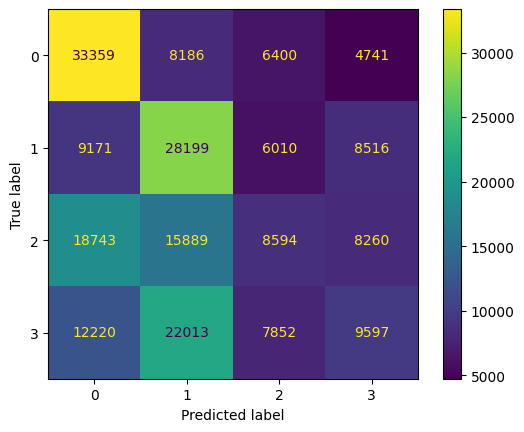

In [207]:
disp = ConfusionMatrixDisplay(matrix)
disp.plot()
for i in range(4):
  print(i, "-->", rendimiento[i])

En la matríz de confusión se puede notar que los datos de rendimiento alto y bajo tienen una alta probabilidad de ser predichos de manera correcta, esto es esperable pues son los datos que suelen tener una mayor desviación en el estudio de los datos hechos en la sección C. Sin embargo se ve que el modelo tiene un gran problema con las dos clases restantes, en especial el rendimiento medio-alto, esto es esperable, pues tiene un comportamiento más uniforme, es decir, mayor incertidumbre.

#### F.3.2. Variables de rendimiento

In [208]:
print("Exactitud: ", exactitud)
print("Precisión: ", presicion)
print("Recall: ", recall)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

Exactitud:  0.38387003610108306
Precisión:  0.38387003610108306
Recall:  0.38387003610108306
Accuracy:  0.38387003540992737
Loss:  1.2796285152435303


Estas métricas muestran un rendimiento pobre del modelo, este solo es capáz de predecir satisfactoriamente 4 de cada 10 datos ingresados, mostrando que la complejidad de los datos no se ajusta tan fácil al modelo.

# G. Conclusiones y resultados

## G.1. Aplicación a los datos de test.csv

A continuación se aplicará el modelo a los datos dentro del dataframe test.csv

In [209]:
X_final_test = np.asarray(final_test[relevant_data[1:len(relevant_data)]].to_numpy()).astype('float32')
final_predictions = model.predict(X_final_test)

9275/9275 [==============================] - 15s 2ms/step


Luego, ajustamos las predicciones a un tipo One_hot esperable según las salidas del modelo:

In [210]:
final_casted_predictions = np.array([[ 1 if i==np.max(j) else 0 for i in j] for j in final_predictions])
final_casted_predictions

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

Sin embargo, la salida del modelo debe ser una cadena de texto, esto lo casteamos al siguiente arreglo:

In [211]:
final_rendimiento = [ rendimiento[1*j[1]+2*j[2]+3*j[3]][19:-1]+'o' for j in final_casted_predictions]

Finalmente, creamos un dataFrame de pandas para finalmente esbribirlo en un .csv.

In [212]:
submission_data_frame = pd.DataFrame(test["ID"])
submission_data_frame['RENDIMIENTO_GLOBAL'] = final_rendimiento

In [213]:
submission_data_frame

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-bajo
2,499179,medio-bajo
3,782980,bajo
4,785185,medio-bajo
...,...,...
296781,496981,bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


## G.2. Conclusiones

Se realizó un análisis de los datos con la finalidad de reducir la complejidad del modelo usando algunos valores de la teoría de la información para reducir el valor en la incertidumbre y poder seleccionar las variables más relevantes para el modelo.

Se montó un modelo de redes neuronales óptimo, según los datos de entrenamiento, explorando los hiperparámetros del modelo. El modelo obtiene un accuracy dell 0.37 en los datos de evaluación seleccionados de manera aleatoria. El modelo fue aplicado sobre los datos del DataFrame test.csv y subidos a la competencia de Kaggle obteniendo un 0.37749.

El modelo no tiene un resultado satisfactorio en las predicciones que hace. El modelo se confunde fácilmente al predecir los valores de rendimiento medio-alto y medio-bajo, esto puede ser producido por algunas causas: Una de ellas es que la distribución de probabilidad de estas clases es uniforme y hace que la incertidumbre del modelo aumente. O por otra parte los datos fueron mal interpretados y hubo una sobresimplificación del modelo.

# H. Generación archivo de envío

Finalmente, se genera el .csv de los datos predichos por el modelo para poder compararlo dentro de la plataforma de Kaggle.

In [214]:
submission_data_frame.to_csv("Data/submission.csv", index = False)